In [1]:
import pandas as pd #for data manipulation and analysis, used for importing the data file
import numpy as np #importing numpy library for numerical computations.
from matplotlib import pyplot as plt #importing pyplot module from matplotlib for data visualization.
from mpl_toolkits.mplot3d import Axes3D #provides a set of tools for creating 3D plots using matplotlib
import seaborn as sns #importing seaborn library for advanced data visualization.
import math #provides mathemathemical functions and constants.
from sklearn.tree import DecisionTreeClassifier #importing DecisionTreeClassifier algorithm from scikit-learn for building decision trees.
from sklearn import tree #importing tree module from scikit-learn for visualizing decision trees.
from sklearn import svm #importing svm module from scikit-learn for Support Vector Machine algorithm.
from sklearn.linear_model import Perceptron # importing Perceptron algorithm from scikit-learn for building Perceptron models.
from sklearn.model_selection import cross_val_score #importing cross_val_score method from scikit-learn for cross-validation.
from sklearn.metrics import confusion_matrix #importing confusion_matrix metric from scikit-learn for evaluating classification performance.

In [2]:
parkinson = pd.read_csv("parkinsons.csv") #importing the data file from the same folder

In [3]:
parkinson #printing the data file

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


In [4]:
parkinson.head() #Printing the first 5 rows as head

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [5]:
parkinson.tail() #Printing the last 5 rows as tail

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569,0


In [6]:
parkinson.shape #Tells the number of rows and columns 

(195, 24)

In [7]:
parkinson.info() #Tells us more information about the datatype, count and not null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
parkinson.isnull().sum() #Checks for missing values in each column 

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [9]:
parkinson.mean(numeric_only=True) #Calculates the mean

MDVP:Fo(Hz)         154.228641
MDVP:Fhi(Hz)        197.104918
MDVP:Flo(Hz)        116.324631
MDVP:Jitter(%)        0.006220
MDVP:Jitter(Abs)      0.000044
MDVP:RAP              0.003306
MDVP:PPQ              0.003446
Jitter:DDP            0.009920
MDVP:Shimmer          0.029709
MDVP:Shimmer(dB)      0.282251
Shimmer:APQ3          0.015664
Shimmer:APQ5          0.017878
MDVP:APQ              0.024081
Shimmer:DDA           0.046993
NHR                   0.024847
HNR                  21.885974
RPDE                  0.498536
DFA                   0.718099
spread1              -5.684397
spread2               0.226510
D2                    2.381826
PPE                   0.206552
status                0.753846
dtype: float64

In [10]:
parkinson.median(numeric_only=True) #Calculates the median 

MDVP:Fo(Hz)         148.790000
MDVP:Fhi(Hz)        175.829000
MDVP:Flo(Hz)        104.315000
MDVP:Jitter(%)        0.004940
MDVP:Jitter(Abs)      0.000030
MDVP:RAP              0.002500
MDVP:PPQ              0.002690
Jitter:DDP            0.007490
MDVP:Shimmer          0.022970
MDVP:Shimmer(dB)      0.221000
Shimmer:APQ3          0.012790
Shimmer:APQ5          0.013470
MDVP:APQ              0.018260
Shimmer:DDA           0.038360
NHR                   0.011660
HNR                  22.085000
RPDE                  0.495954
DFA                   0.722254
spread1              -5.720868
spread2               0.218885
D2                    2.361532
PPE                   0.194052
status                1.000000
dtype: float64

In [11]:
parkinson.min(numeric_only=True) #Calculates the minimum value 

MDVP:Fo(Hz)          88.333000
MDVP:Fhi(Hz)        102.145000
MDVP:Flo(Hz)         65.476000
MDVP:Jitter(%)        0.001680
MDVP:Jitter(Abs)      0.000007
MDVP:RAP              0.000680
MDVP:PPQ              0.000920
Jitter:DDP            0.002040
MDVP:Shimmer          0.009540
MDVP:Shimmer(dB)      0.085000
Shimmer:APQ3          0.004550
Shimmer:APQ5          0.005700
MDVP:APQ              0.007190
Shimmer:DDA           0.013640
NHR                   0.000650
HNR                   8.441000
RPDE                  0.256570
DFA                   0.574282
spread1              -7.964984
spread2               0.006274
D2                    1.423287
PPE                   0.044539
status                0.000000
dtype: float64

In [12]:
parkinson.max(numeric_only=True) #Calculates the maximum value

MDVP:Fo(Hz)         260.105000
MDVP:Fhi(Hz)        592.030000
MDVP:Flo(Hz)        239.170000
MDVP:Jitter(%)        0.033160
MDVP:Jitter(Abs)      0.000260
MDVP:RAP              0.021440
MDVP:PPQ              0.019580
Jitter:DDP            0.064330
MDVP:Shimmer          0.119080
MDVP:Shimmer(dB)      1.302000
Shimmer:APQ3          0.056470
Shimmer:APQ5          0.079400
MDVP:APQ              0.137780
Shimmer:DDA           0.169420
NHR                   0.314820
HNR                  33.047000
RPDE                  0.685151
DFA                   0.825288
spread1              -2.434031
spread2               0.450493
D2                    3.671155
PPE                   0.527367
status                1.000000
dtype: float64

In [13]:
parkinson.count() #Counts the total number of instances for each attribute

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      195
MDVP:Jitter(Abs)    195
MDVP:RAP            195
MDVP:PPQ            195
Jitter:DDP          195
MDVP:Shimmer        195
MDVP:Shimmer(dB)    195
Shimmer:APQ3        195
Shimmer:APQ5        195
MDVP:APQ            195
Shimmer:DDA         195
NHR                 195
HNR                 195
RPDE                195
DFA                 195
spread1             195
spread2             195
D2                  195
PPE                 195
status              195
dtype: int64

In [14]:
parkinson.std(numeric_only=True) #Calculates the standard deviation for each attribute

MDVP:Fo(Hz)         41.390065
MDVP:Fhi(Hz)        91.491548
MDVP:Flo(Hz)        43.521413
MDVP:Jitter(%)       0.004848
MDVP:Jitter(Abs)     0.000035
MDVP:RAP             0.002968
MDVP:PPQ             0.002759
Jitter:DDP           0.008903
MDVP:Shimmer         0.018857
MDVP:Shimmer(dB)     0.194877
Shimmer:APQ3         0.010153
Shimmer:APQ5         0.012024
MDVP:APQ             0.016947
Shimmer:DDA          0.030459
NHR                  0.040418
HNR                  4.425764
RPDE                 0.103942
DFA                  0.055336
spread1              1.090208
spread2              0.083406
D2                   0.382799
PPE                  0.090119
status               0.431878
dtype: float64

In [15]:
parkinson.describe() #One function that tells us all the statistical measures of the data.

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


In [16]:
parkinson['status'].value_counts() #Here 1 means the patient has Parkinson's Disease (Parkison Positive) whereas 0 is initialized for a Healthy person(Parkison Negative).

1    147
0     48
Name: status, dtype: int64

In [17]:
parkinson.groupby('status').mean(numeric_only=True) #Calculates mean seperately for those pateints who have Parkinson's Disease and for those that are healthy.

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


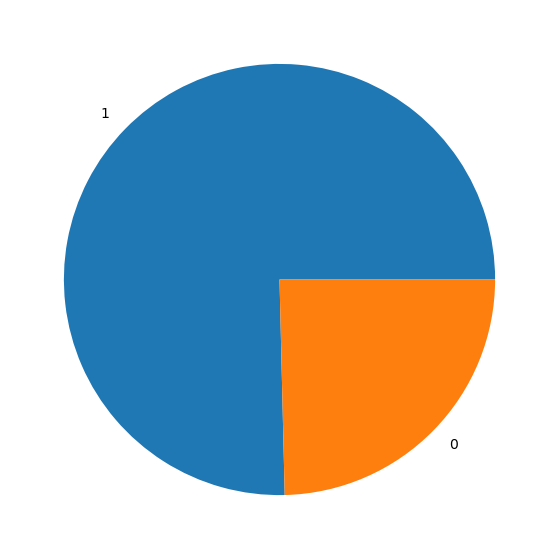

In [18]:
fig = plt.figure(figsize =(10, 7)) #Used matplotlib for creating a pie chart, visualizing the class distribution.
plt.pie(parkinson['status'].value_counts(), labels = parkinson['status'].unique())
plt.show()

In [19]:
X = parkinson.drop(columns=['name','status'], axis=1) #Drops two attributes name and status 
Y = parkinson['status'] #Sets label as 0 or 1 repectively

C:\Users\Karan\AppData\Local\Temp\ipykernel_9492\2869566216.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


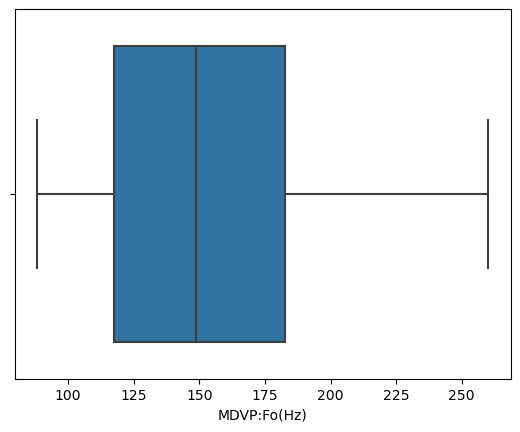

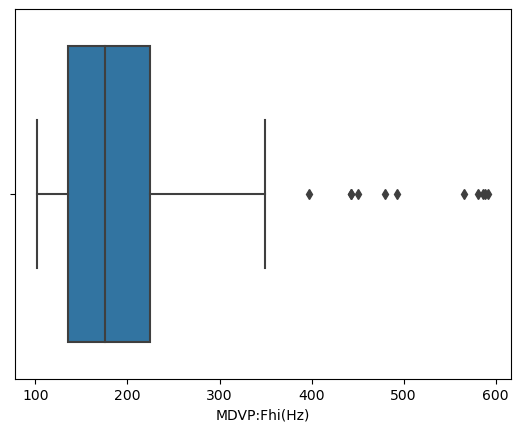

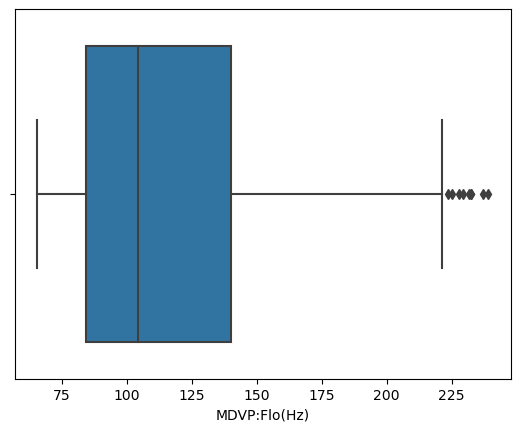

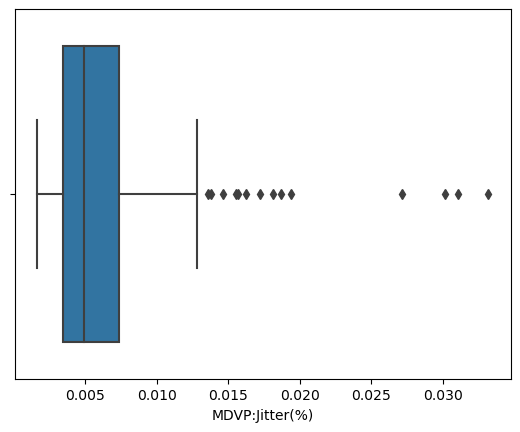

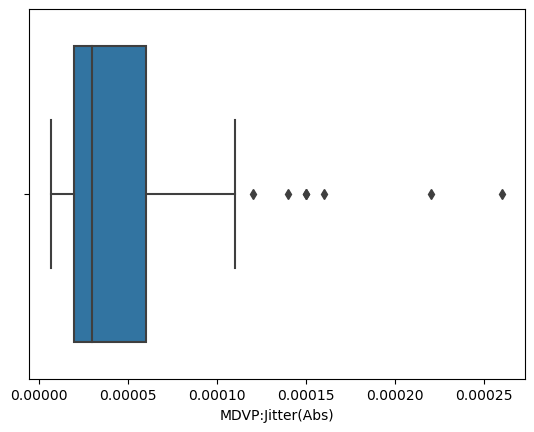

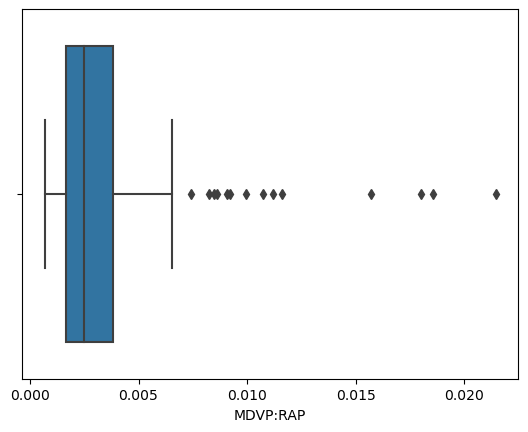

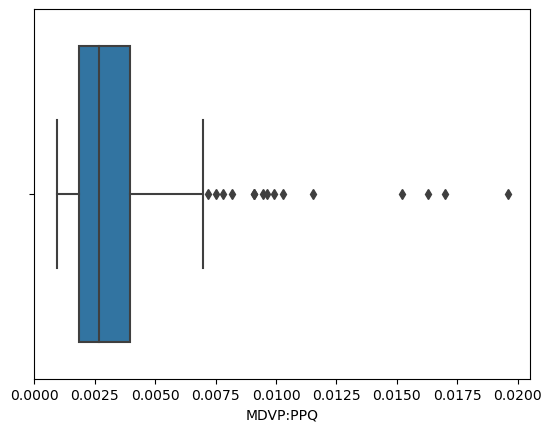

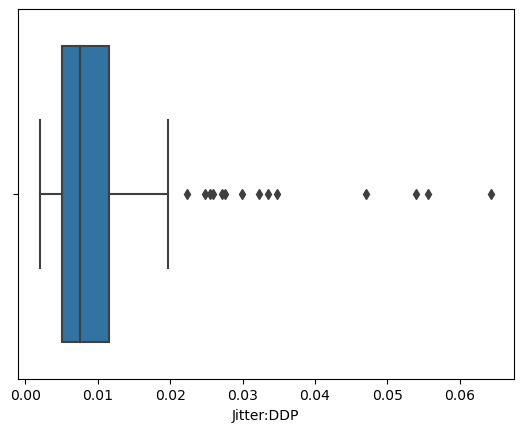

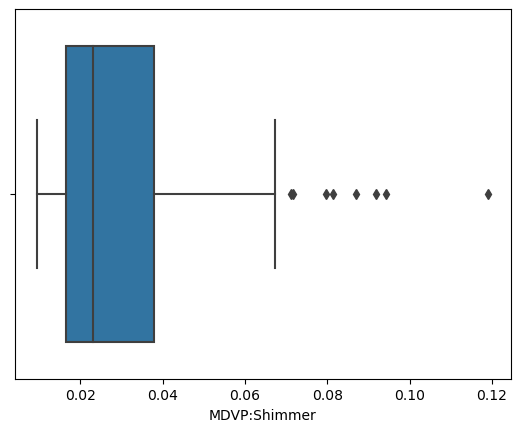

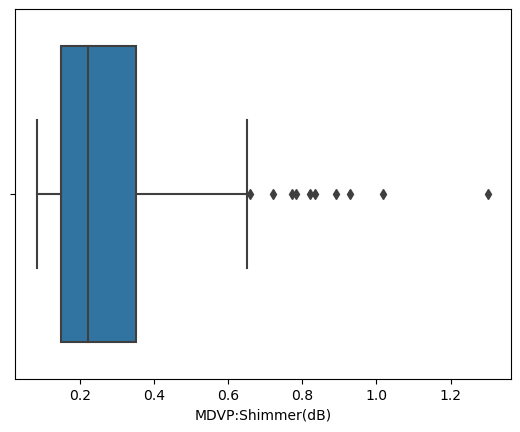

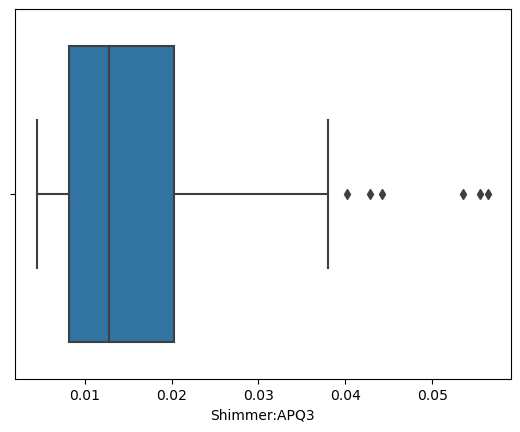

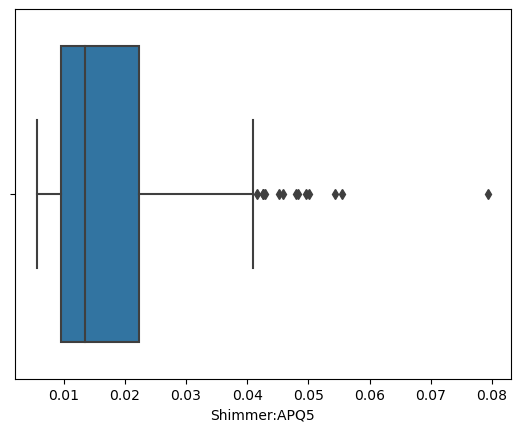

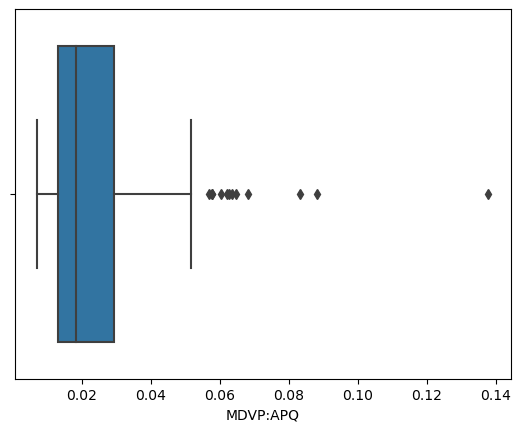

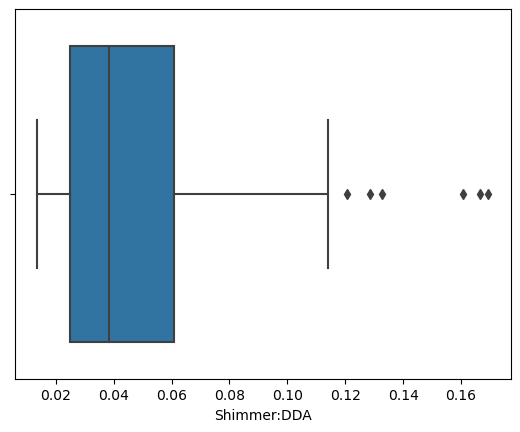

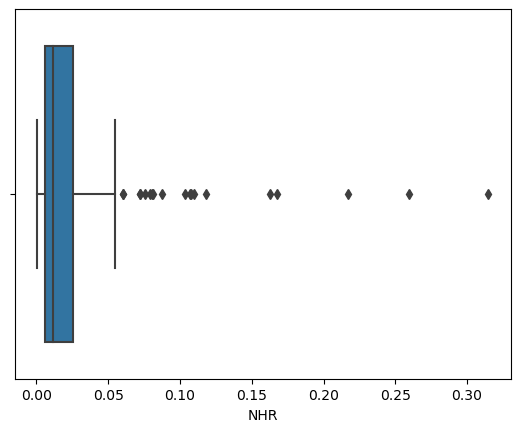

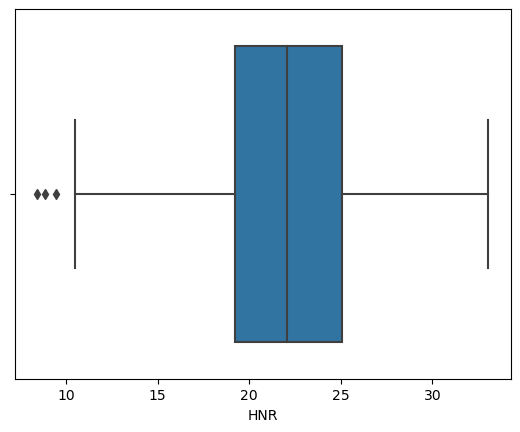

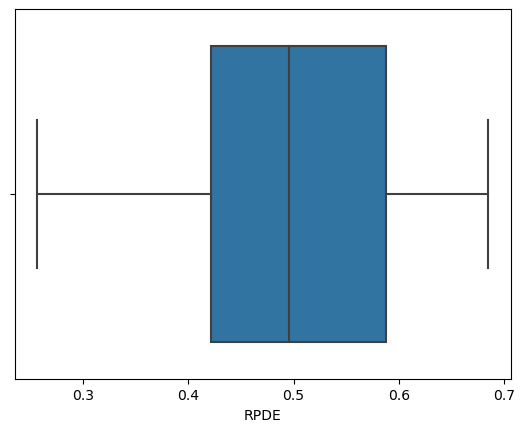

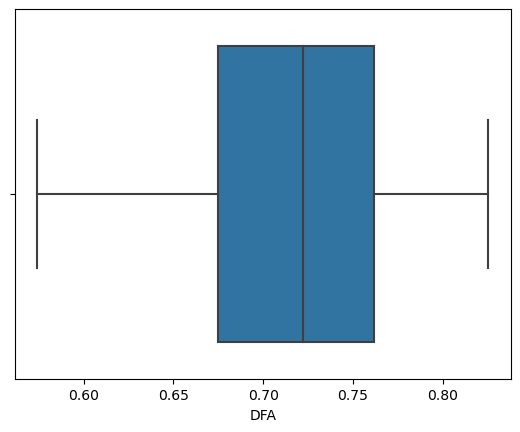

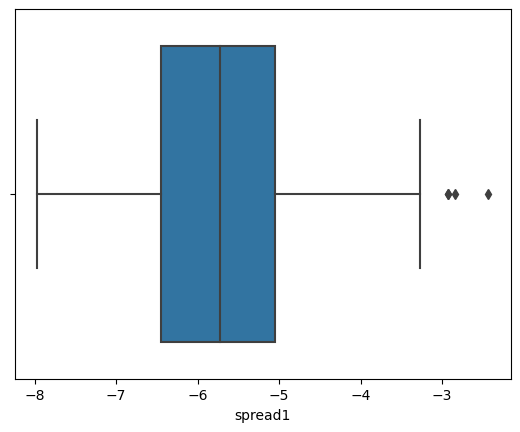

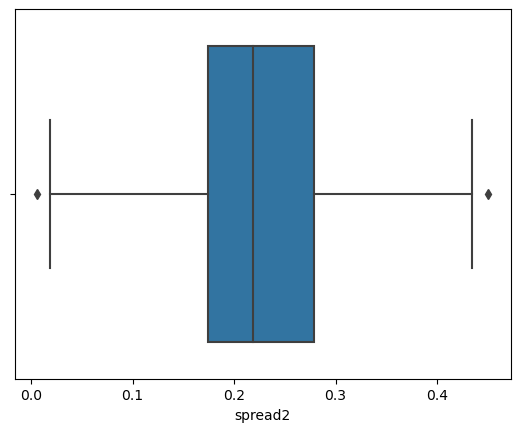

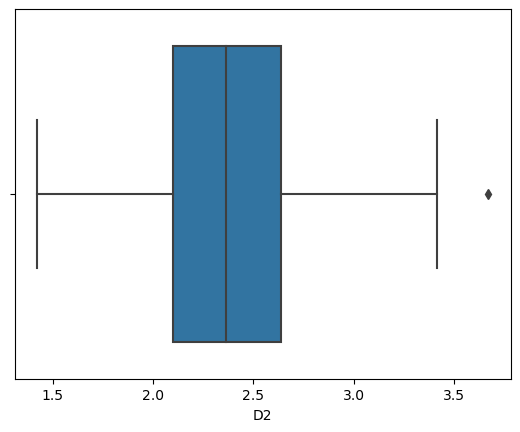

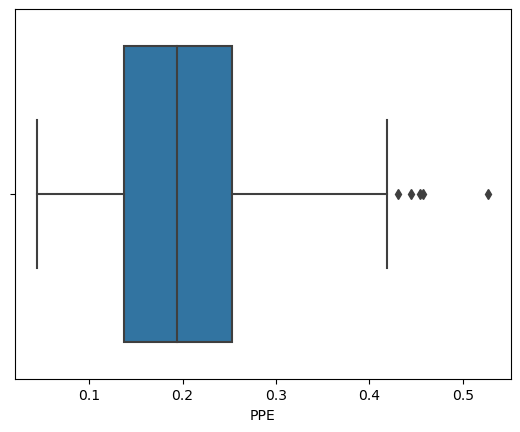

In [20]:
for column in X.columns:
        plt.figure()
        sns.boxplot(x=column, data=X) #creates a bloxplot for each feature to identify the outlier.

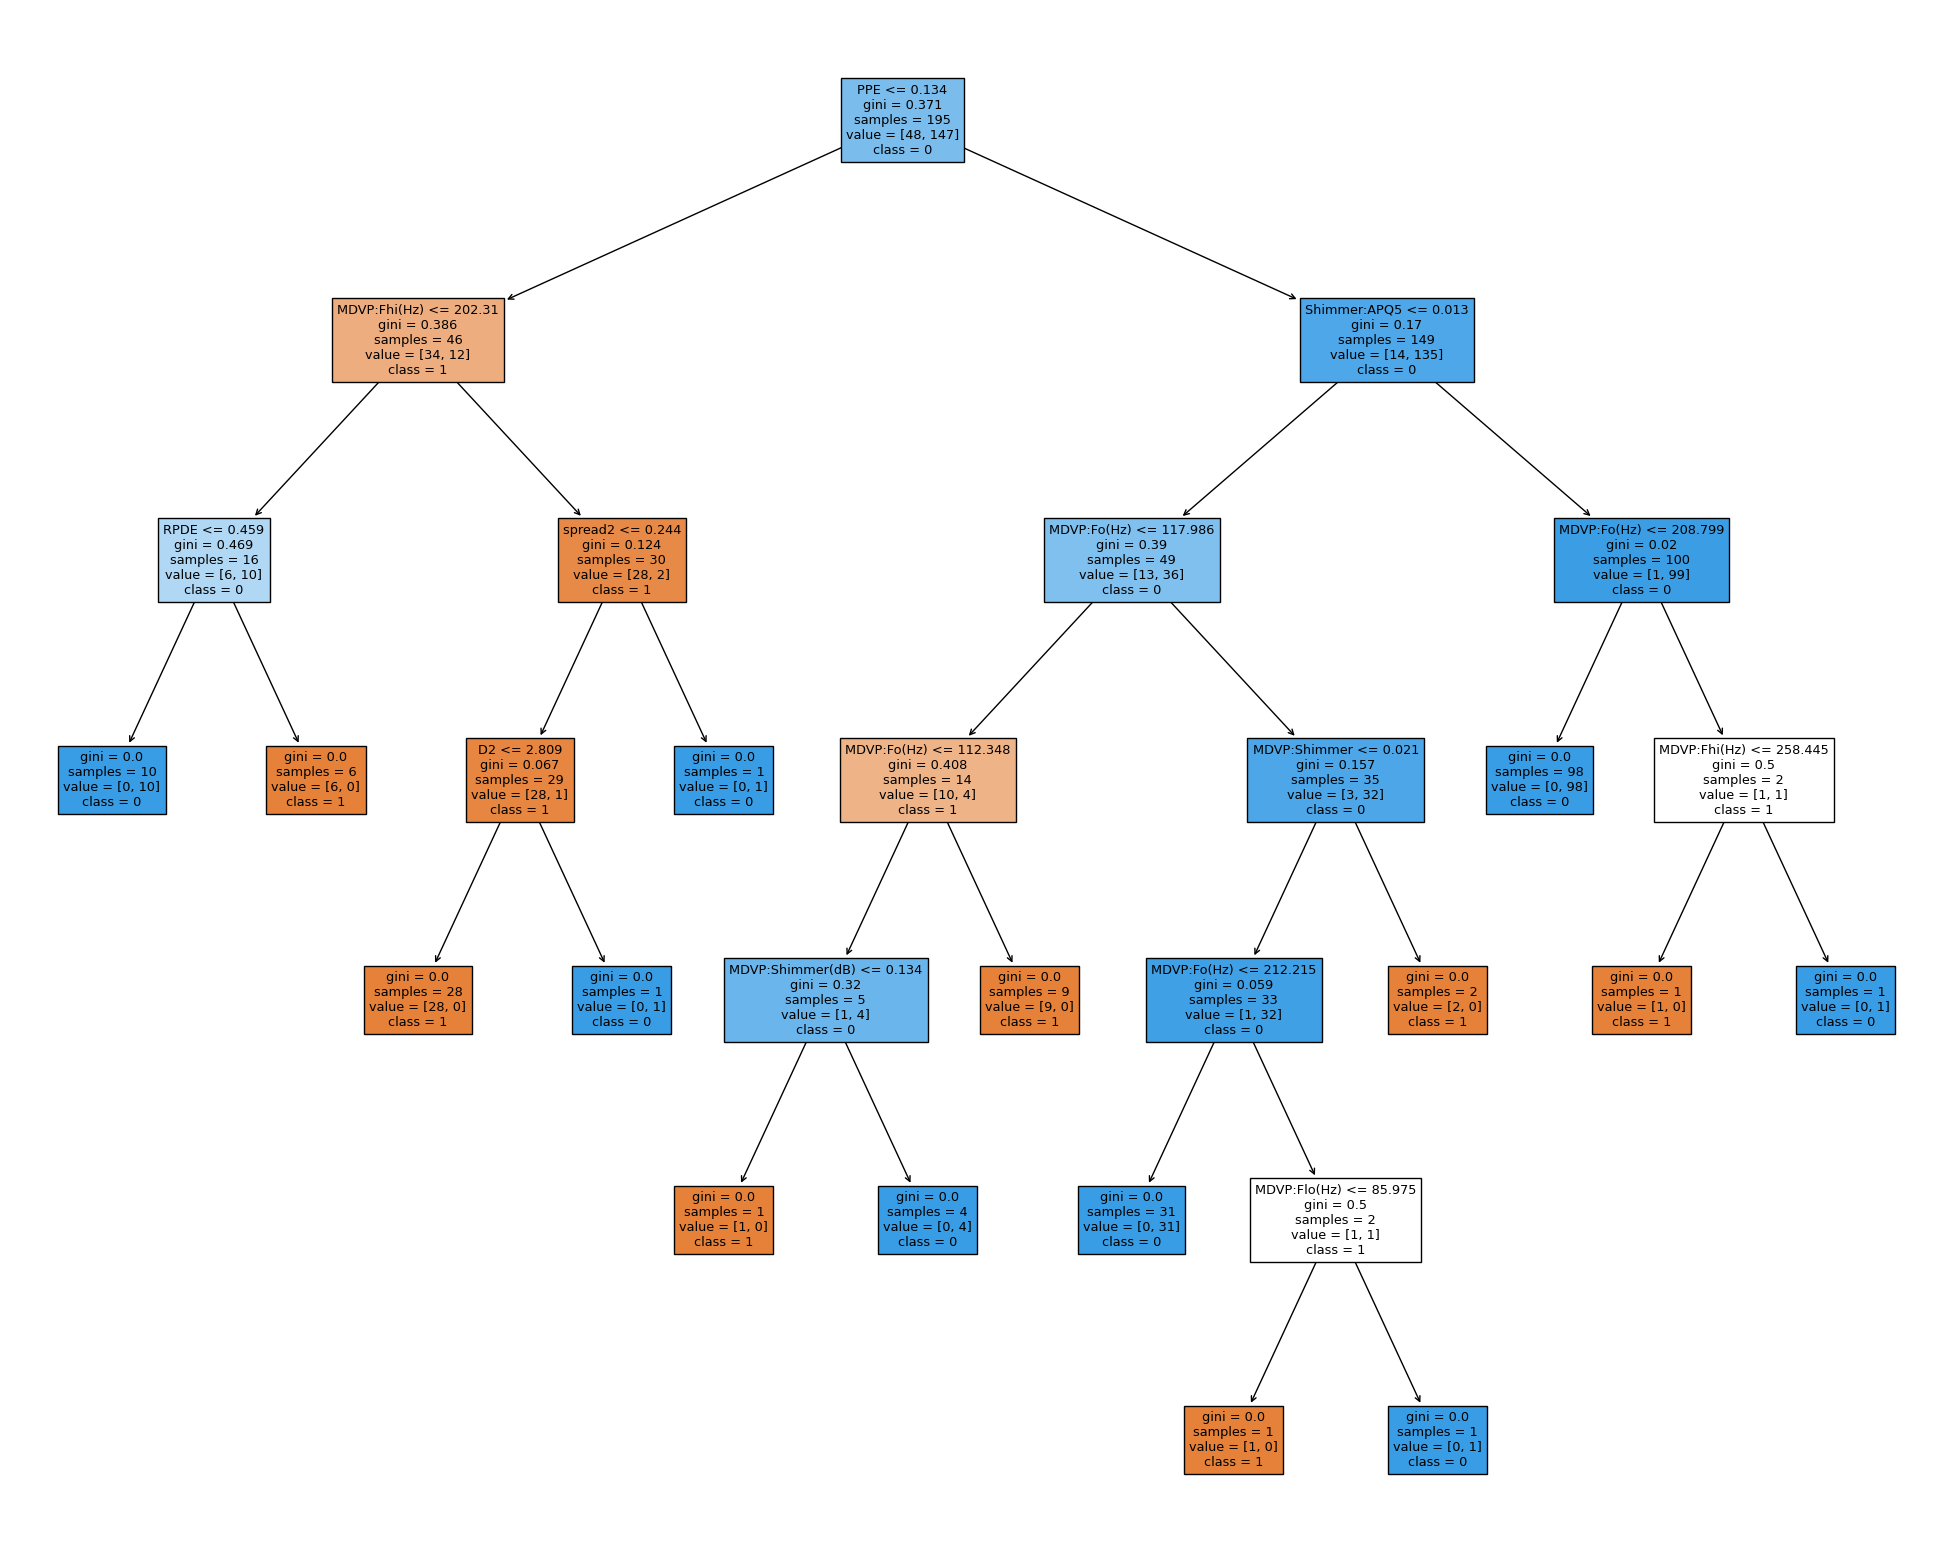

In [21]:
clf = DecisionTreeClassifier(random_state=1234) #A Decision Tree Classifier is being created and stored in the variable clf. The random_state parameter is set to 1234, which is a seed value for generating random numbers used by the classifier.
model = clf.fit(X, Y) #he decision tree classifier clf is trained on the input data X (features) and Y (labels) using the fit() method. The trained model is stored in the variable model
feature_names = X.columns.astype(str).tolist() #We are creating a list of strings which contains the names of the columns in our input data X.
class_names = Y.unique().astype(str).tolist() #We are creating a list of strings which contains the unique values in our target variable Y.
fig = plt.figure(figsize=(25,20)) #We are creating a figure object to hold our decision tree plot with a specific width and height.
trees = tree.plot_tree(clf, 
                   feature_names=feature_names,
                   class_names=class_names,
                   filled=True) #We are using the tree.plot_tree() function from the tree module to create a visualization of the decision tree represented by the clf object. We are passing in the feature and class names we created earlier as well as specifying that we want the tree to be filled with color.
fig.savefig("decistion_tree.png") # We are saving the plot of the decision tree to a file named "decision_tree.png".

In [22]:
X = parkinson[['PPE','MDVP:Fhi(Hz)','Shimmer:APQ5','RPDE', 'spread2', 'MDVP:Fo(Hz)', 'D2', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'MDVP:Flo(Hz)']] # X are the features or attributes

In [23]:
print(X) #Prints all the important features extracted from the decision tree.

          PPE  MDVP:Fhi(Hz)  Shimmer:APQ5      RPDE   spread2  MDVP:Fo(Hz)  \
0    0.284654       157.302       0.03130  0.414783  0.266482      119.992   
1    0.368674       148.650       0.04518  0.458359  0.335590      122.400   
2    0.332634       131.111       0.03858  0.429895  0.311173      116.682   
3    0.368975       137.871       0.04005  0.434969  0.334147      116.676   
4    0.410335       141.781       0.04825  0.417356  0.234513      116.014   
..        ...           ...           ...       ...       ...          ...   
190  0.133050       230.978       0.02498  0.448439  0.121952      174.188   
191  0.168895       253.017       0.01657  0.431674  0.129303      209.516   
192  0.131728       240.005       0.01365  0.407567  0.158453      174.688   
193  0.123306       396.961       0.01321  0.451221  0.207454      198.764   
194  0.148569       260.277       0.01161  0.462803  0.190667      214.289   

           D2  MDVP:Shimmer  MDVP:Shimmer(dB)  MDVP:Flo(Hz)  
0

In [24]:
print(Y) #Prints the labels for each instances.

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [25]:
X.describe() #One function that tells us all the statistical measures of the data.

,PPE,MDVP:Fhi(Hz),Shimmer:APQ5,RPDE,spread2,MDVP:Fo(Hz),D2,MDVP:Shimmer,MDVP:Shimmer(dB),MDVP:Flo(Hz)
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.206552,197.104918,0.017878,0.498536,0.226510,154.228641,2.381826,0.029709,0.282251,116.324631
std,0.090119,91.491548,0.012024,0.103942,0.083406,41.390065,0.382799,0.018857,0.194877,43.521413
min,0.044539,102.145000,0.005700,0.256570,0.006274,88.333000,1.423287,0.009540,0.085000,65.476000
25%,0.137451,134.862500,0.009580,0.421306,0.174351,117.572000,2.099125,0.016505,0.148500,84.291000
50%,0.194052,175.829000,0.013470,0.495954,0.218885,148.790000,2.361532,0.022970,0.221000,104.315000
75%,0.252980,224.205500,0.022380,0.587562,0.279234,182.769000,2.636456,0.037885,0.350000,140.018500
max,0.527367,592.030000,0.079400,0.685151,0.450493,260.105000,3.671155,0.119080,1.302000,239.170000


<Figure size 640x480 with 0 Axes>

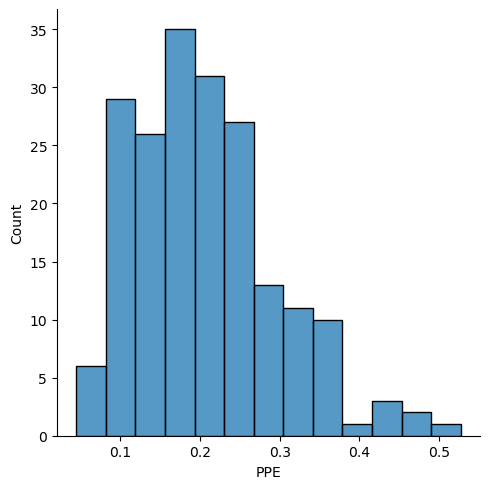

<Figure size 640x480 with 0 Axes>

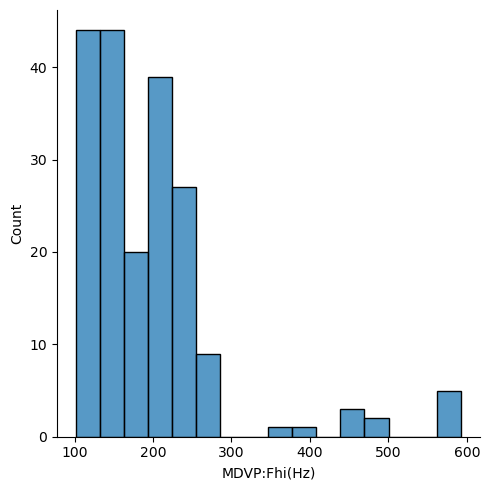

<Figure size 640x480 with 0 Axes>

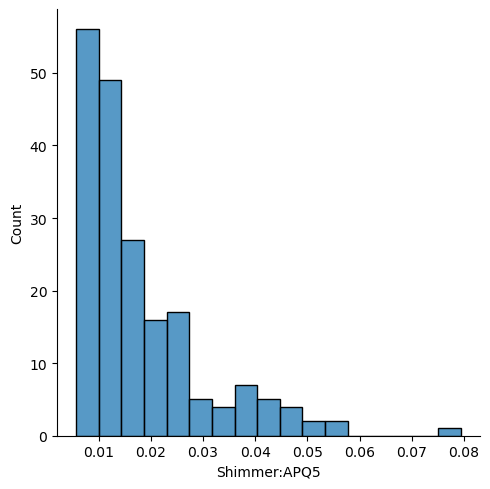

<Figure size 640x480 with 0 Axes>

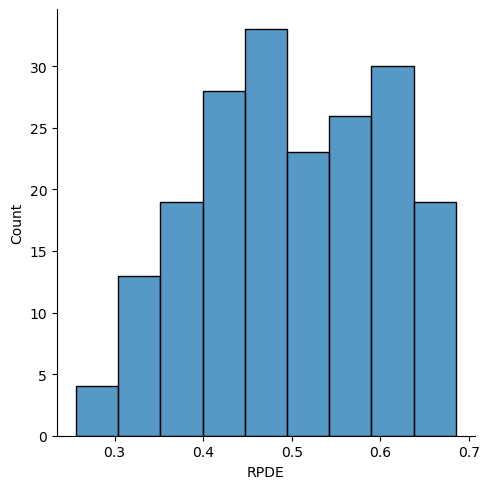

<Figure size 640x480 with 0 Axes>

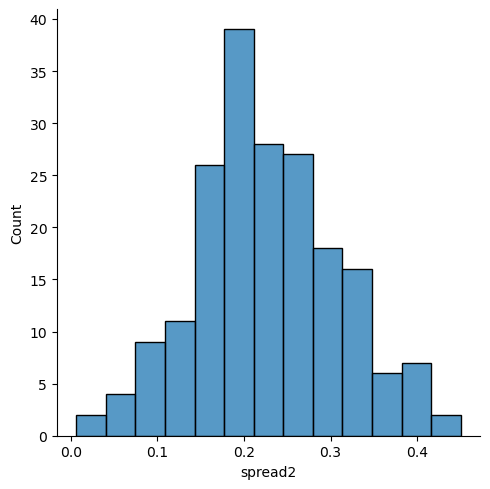

<Figure size 640x480 with 0 Axes>

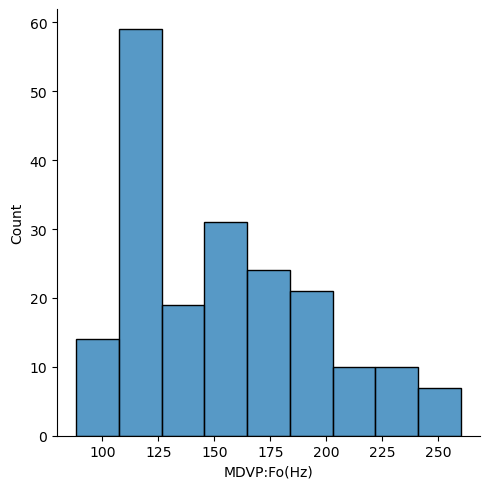

<Figure size 640x480 with 0 Axes>

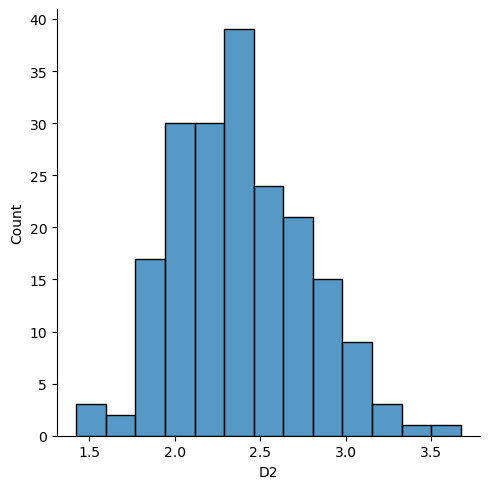

<Figure size 640x480 with 0 Axes>

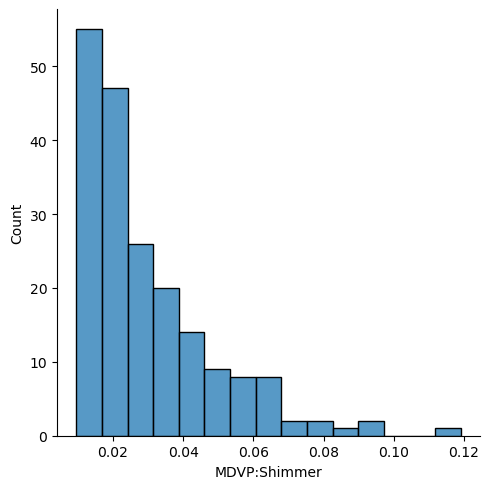

<Figure size 640x480 with 0 Axes>

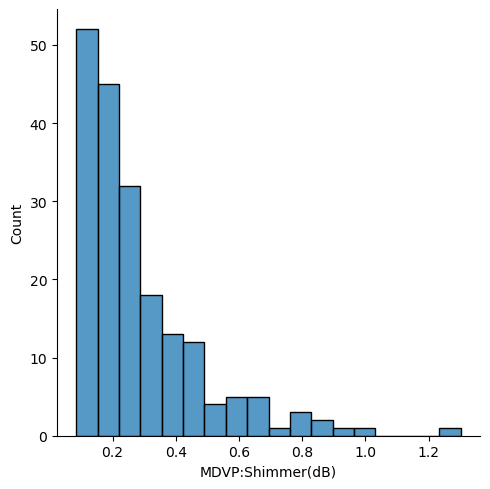

<Figure size 640x480 with 0 Axes>

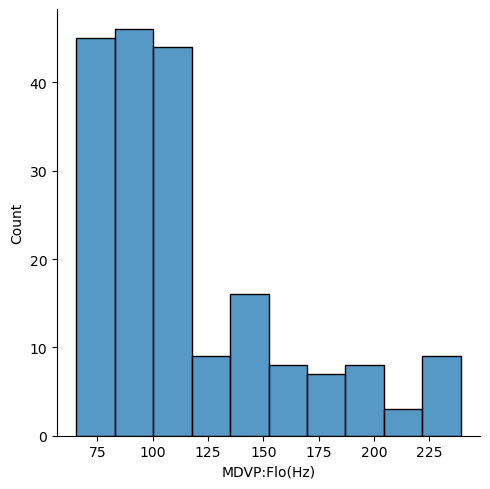

In [26]:
for column in X.columns:
        plt.figure()
        sns.displot(x=column, data=X) #Uses matplotlib for displaying a displot for each feature. Runs in a loop for all the 10 features.

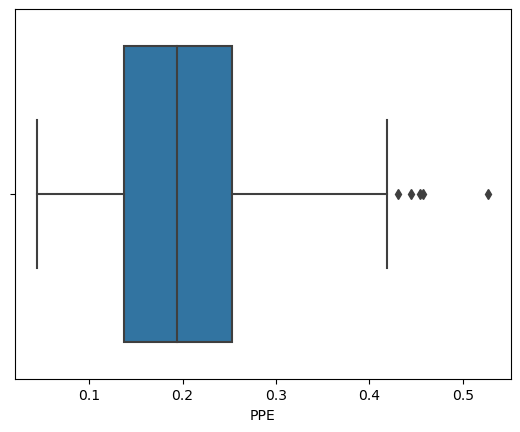

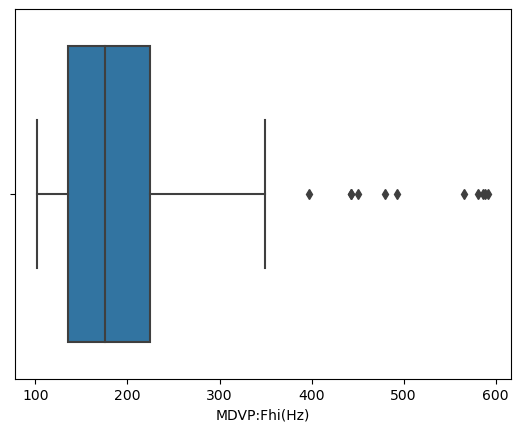

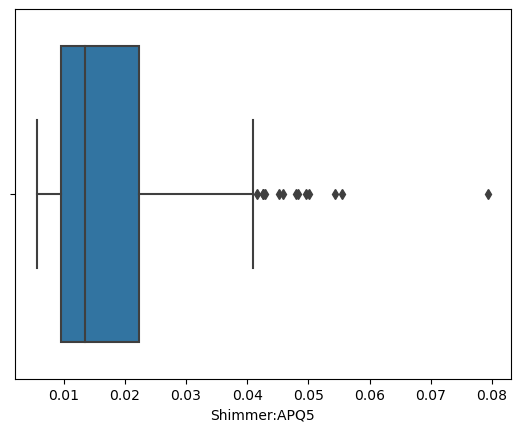

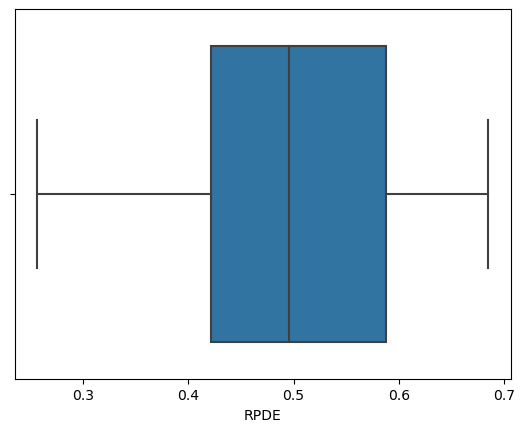

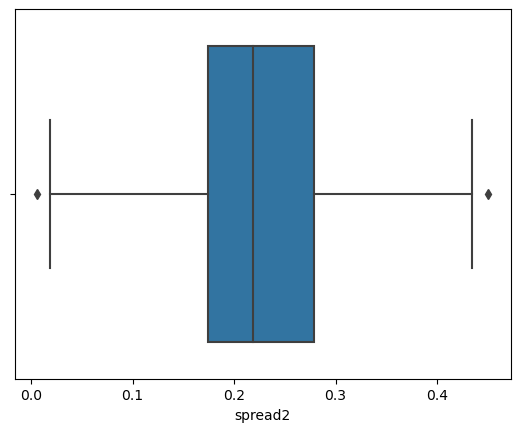

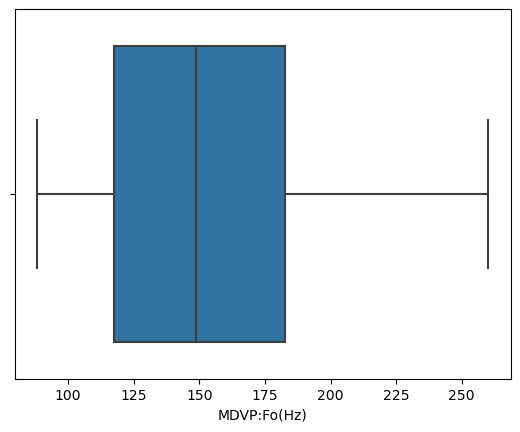

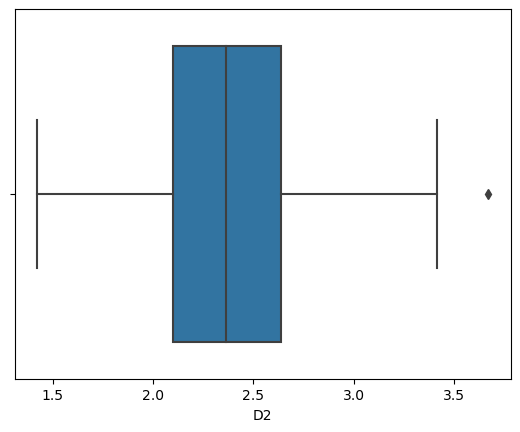

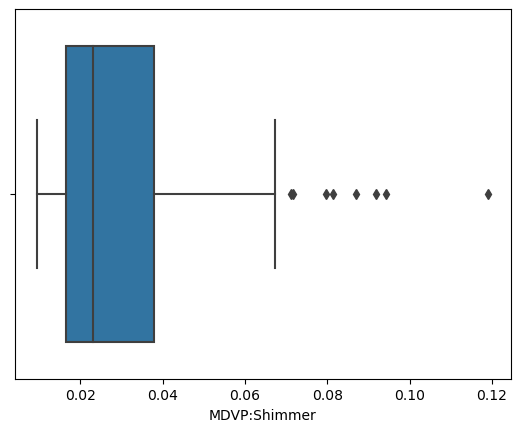

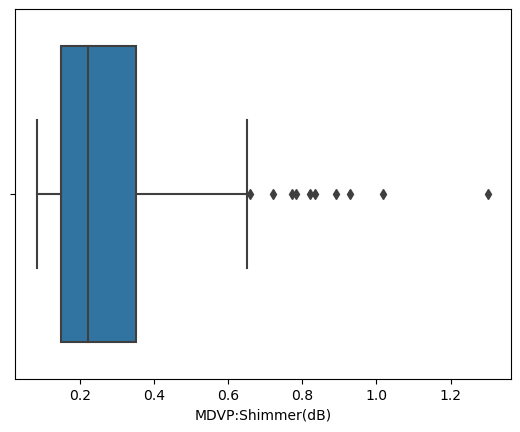

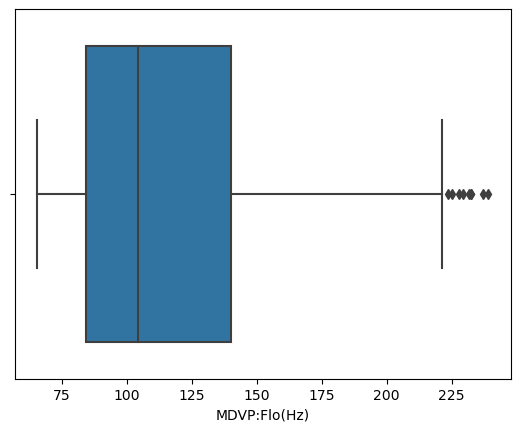

In [27]:
for column in X.columns:
        plt.figure()
        sns.boxplot(x=column, data=X) #creates a bloxplot for each feature to identify the outlier, works only for the extracted 10 important features

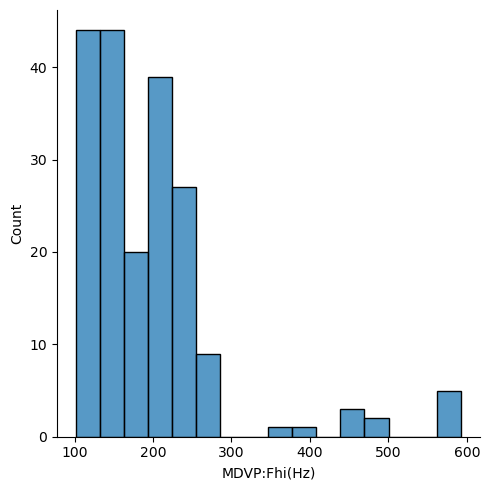

In [28]:
sns.displot(X['MDVP:Fhi(Hz)']) #Before winsorization displot

<Axes: xlabel='MDVP:Fhi(Hz)'>

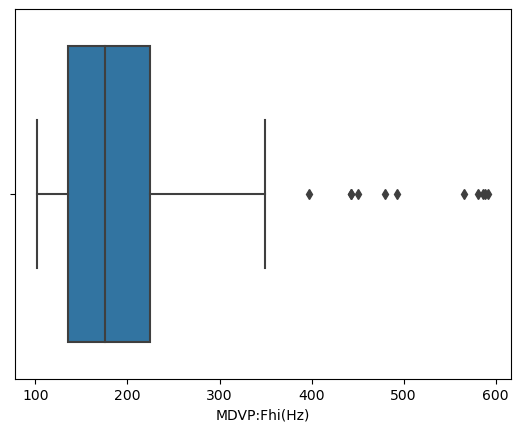

In [29]:
sns.boxplot(x='MDVP:Fhi(Hz)', data=X) #Before winsorization boxplot with outliers

In [30]:
upper_limit = X['MDVP:Fhi(Hz)'].quantile(0.90) #Calculates the 90th percentile and stores it in the variable upper_limit
lower_limit = X['MDVP:Fhi(Hz)'].quantile(0.10) #Calculates the 10th percentile and stores it in the variable lower_limit
X['MDVP:Fhi(Hz)'] = np.where(X['MDVP:Fhi(Hz)']>= upper_limit, #if the value in the 'MDVP:Fhi(Hz)' column is greater than or equal to the 'upper_limit' value we found earlier, then we replace it with the 'upper_limit' value.
        upper_limit, #Replace the value in the 'MDVP:Fhi(Hz)' column with if it meets the condition in the previous line.
        np.where(X['MDVP:Fhi(Hz)'] <= lower_limit, #we are checking if the value in the 'MDVP:Fhi(Hz)' column is less than or equal to the 'lower_limit' value we found earlier.
        lower_limit, #Replaces the value with lower limit.
        X['MDVP:Fhi(Hz)'])) #The outliers corresponding to the upper limit are exchanged with the value of upper limit and the values corresponding to lower limit are assigned that. Values falling in range are kept unchanged.

C:\Users\Karan\AppData\Local\Temp\ipykernel_9492\3583364890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MDVP:Fhi(Hz)'] = np.where(X['MDVP:Fhi(Hz)']>= upper_limit, #if the value in the 'MDVP:Fhi(Hz)' column is greater than or equal to the 'upper_limit' value we found earlier, then we replace it with the 'upper_limit' value.


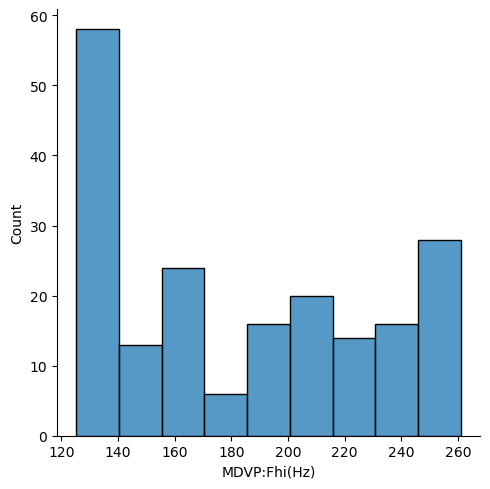

In [31]:
sns.displot(X['MDVP:Fhi(Hz)']) #After winsorization displot

<Axes: xlabel='MDVP:Fhi(Hz)'>

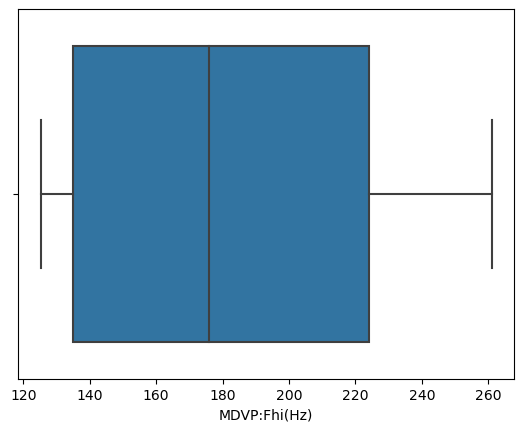

In [32]:
sns.boxplot(x='MDVP:Fhi(Hz)', data=X) #After winzorization boxplot

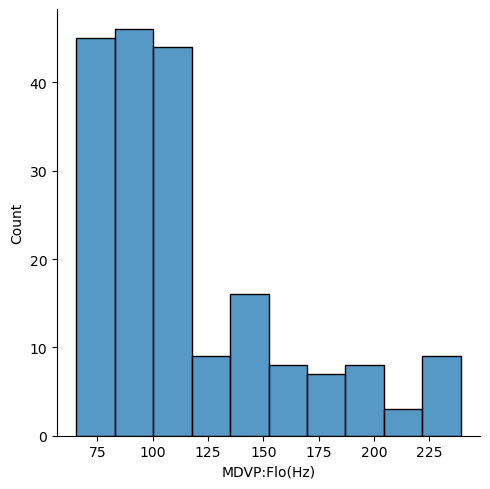

In [33]:
sns.displot(X['MDVP:Flo(Hz)']) #Before winsorization displot

<Axes: xlabel='MDVP:Flo(Hz)'>

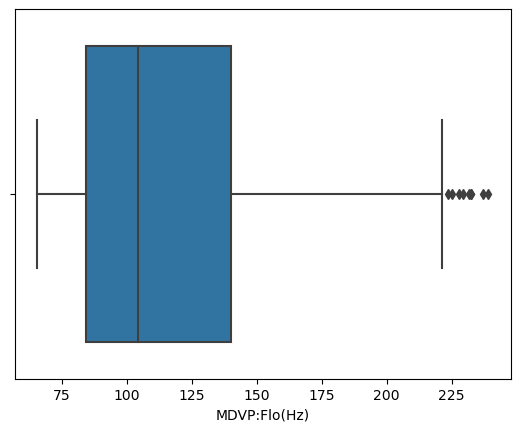

In [34]:
sns.boxplot(x='MDVP:Flo(Hz)', data=X) #Before winsorization boxplot with outliers

In [35]:
upper_limit = X['MDVP:Flo(Hz)'].quantile(0.95) #Calculates the 95th percentile and stores it in upper_limit
lower_limit = X['MDVP:Flo(Hz)'].quantile(0.05) #Calculates the 5th percentile and stores it in lower_limit
X['MDVP:Flo(Hz)'] = np.where(X['MDVP:Flo(Hz)']>= upper_limit, 
        upper_limit,
        np.where(X['MDVP:Flo(Hz)'] <= lower_limit,
        lower_limit,
        X['MDVP:Flo(Hz)'])) #The outliers corresponding to the upper limit are exchanged with the value of upper limit and the values corresponding to lower limit are assigned that. Values falling in range are kept unchanged.

C:\Users\Karan\AppData\Local\Temp\ipykernel_9492\3832870505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MDVP:Flo(Hz)'] = np.where(X['MDVP:Flo(Hz)']>= upper_limit,


<Axes: xlabel='MDVP:Flo(Hz)'>

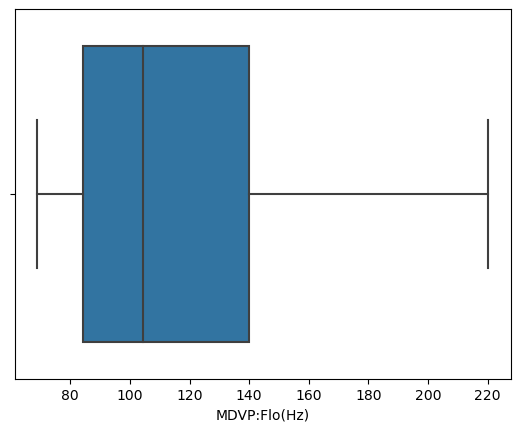

In [36]:
sns.boxplot(x='MDVP:Flo(Hz)', data=X) #After winsorization boxplot

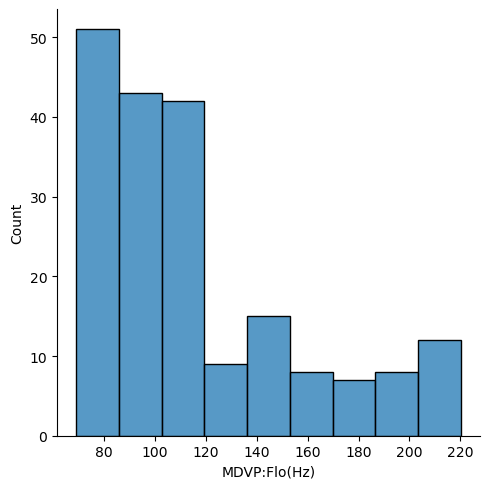

In [37]:
sns.displot(X['MDVP:Flo(Hz)']) #After winsorization displot

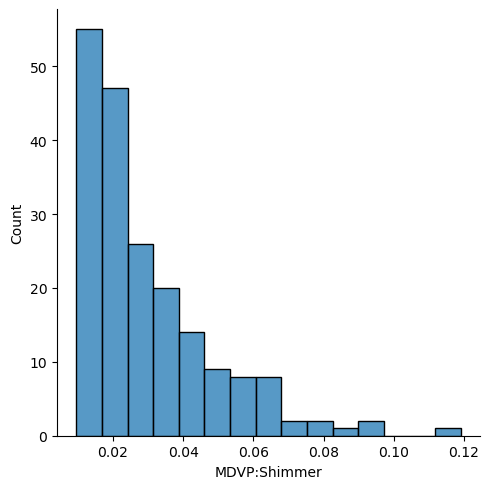

In [38]:
sns.displot(X['MDVP:Shimmer']) #Before winsorization displot

<Axes: xlabel='MDVP:Shimmer'>

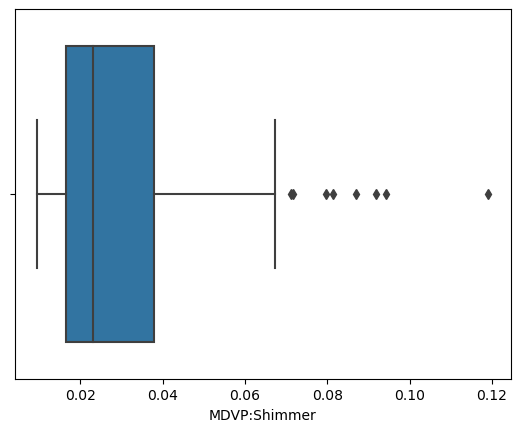

In [39]:
sns.boxplot(x='MDVP:Shimmer', data=X) #Before winsorization boxplot with outliers

In [40]:
upper_limit = X['MDVP:Shimmer'].quantile(0.95)
lower_limit = X['MDVP:Shimmer'].quantile(0.05)
X['MDVP:Shimmer'] = np.where(X['MDVP:Shimmer']>= upper_limit,
        upper_limit,
        np.where(X['MDVP:Shimmer'] <= lower_limit,
        lower_limit,
        X['MDVP:Shimmer']))

C:\Users\Karan\AppData\Local\Temp\ipykernel_9492\3840104464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MDVP:Shimmer'] = np.where(X['MDVP:Shimmer']>= upper_limit,


<Axes: xlabel='MDVP:Shimmer'>

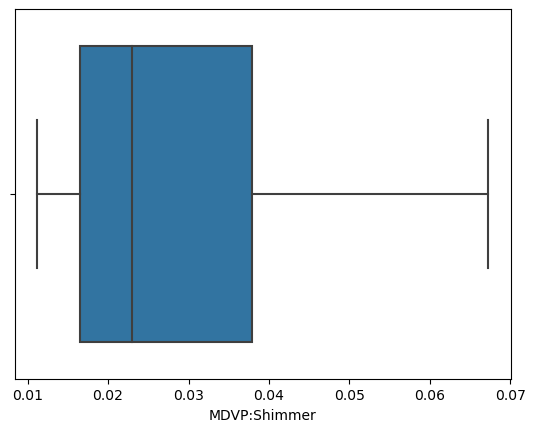

In [41]:
sns.boxplot(x='MDVP:Shimmer', data=X) #After winsorization boxplot

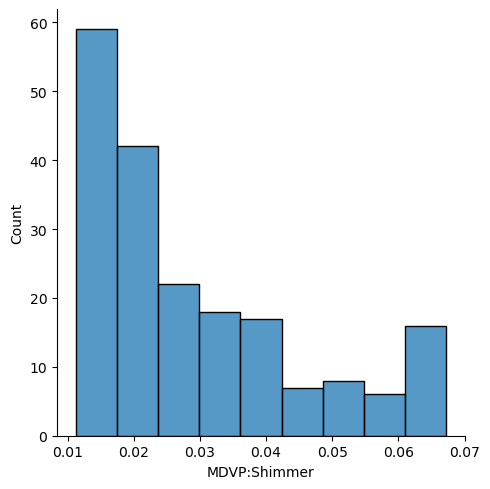

In [42]:
sns.displot(X['MDVP:Shimmer']) #After winsorization displot

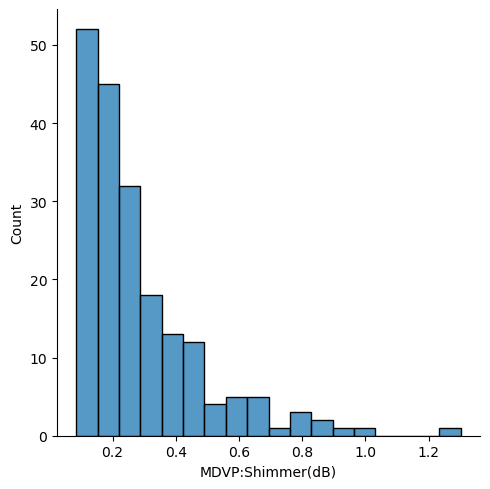

In [43]:
sns.displot(X['MDVP:Shimmer(dB)']) #Before winsorization displot

<Axes: xlabel='MDVP:Shimmer(dB)'>

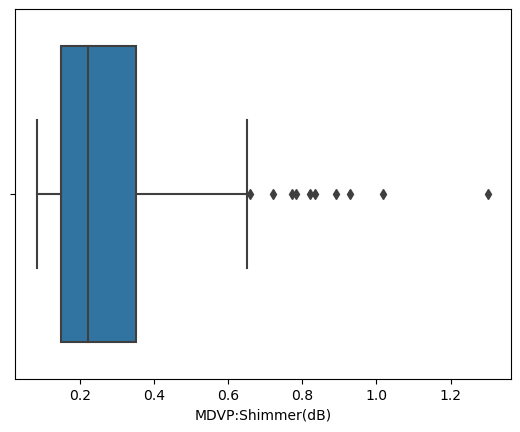

In [44]:
sns.boxplot(x='MDVP:Shimmer(dB)', data=X) #Before winsorization boxplot with outliers

In [45]:
upper_limit = X['MDVP:Shimmer(dB)'].quantile(0.90)
lower_limit = X['MDVP:Shimmer(dB)'].quantile(0.10)
X['MDVP:Shimmer(dB)'] = np.where(X['MDVP:Shimmer(dB)']>= upper_limit,
        upper_limit,
        np.where(X['MDVP:Shimmer(dB)'] <= lower_limit,
        lower_limit,
        X['MDVP:Shimmer(dB)']))

C:\Users\Karan\AppData\Local\Temp\ipykernel_9492\1199740171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MDVP:Shimmer(dB)'] = np.where(X['MDVP:Shimmer(dB)']>= upper_limit,


<Axes: xlabel='MDVP:Shimmer(dB)'>

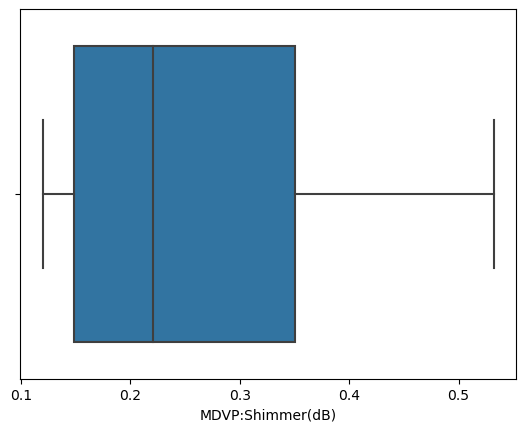

In [46]:
sns.boxplot(x='MDVP:Shimmer(dB)', data=X) #After winsorization boxplot

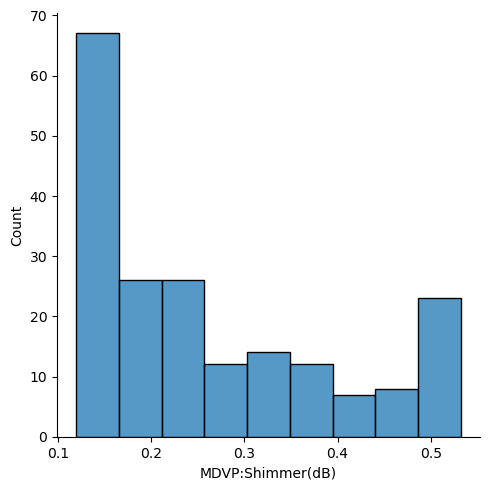

In [47]:
sns.displot(X['MDVP:Shimmer(dB)']) #After winsorization displot

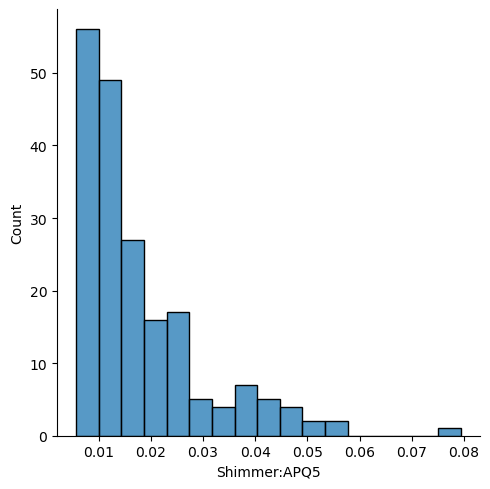

In [48]:
sns.displot(X['Shimmer:APQ5']) #Before winsorization displot

<Axes: xlabel='Shimmer:APQ5'>

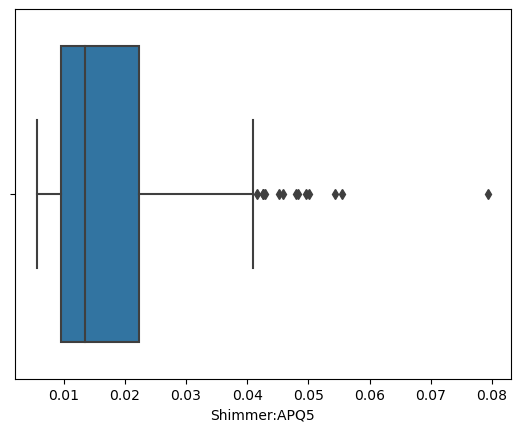

In [49]:
sns.boxplot(x='Shimmer:APQ5', data=X) #Before winsorization boxplot with outliers

In [50]:
upper_limit = X['Shimmer:APQ5'].quantile(0.90)
lower_limit = X['Shimmer:APQ5'].quantile(0.10)
X['Shimmer:APQ5'] = np.where(X['Shimmer:APQ5']>= upper_limit,
        upper_limit,
        np.where(X['Shimmer:APQ5'] <= lower_limit,
        lower_limit,
        X['Shimmer:APQ5']))

C:\Users\Karan\AppData\Local\Temp\ipykernel_9492\1182385559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Shimmer:APQ5'] = np.where(X['Shimmer:APQ5']>= upper_limit,


<Axes: xlabel='Shimmer:APQ5'>

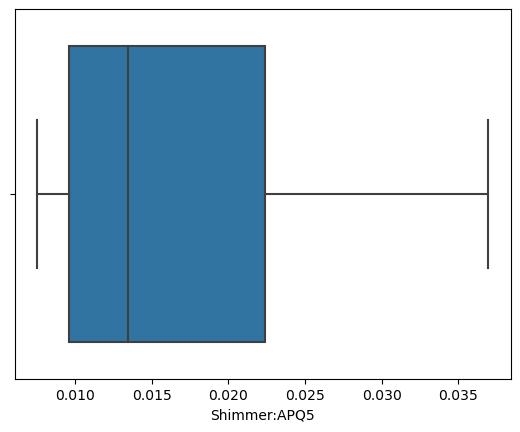

In [51]:
sns.boxplot(x='Shimmer:APQ5', data=X) #After winsorization boxplot

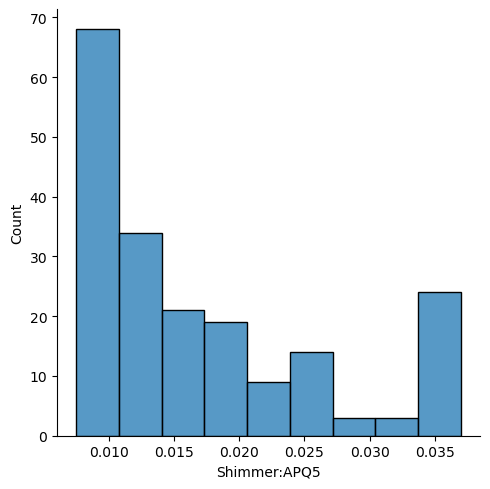

In [52]:
sns.displot(X['Shimmer:APQ5']) #After winsorization displot

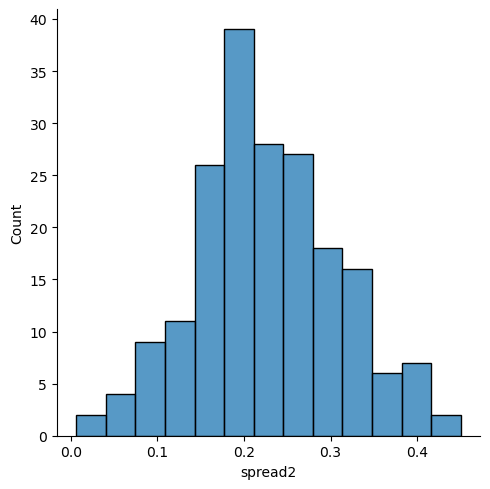

In [53]:
sns.displot(X['spread2']) #Before winsorization displot

<Axes: xlabel='spread2'>

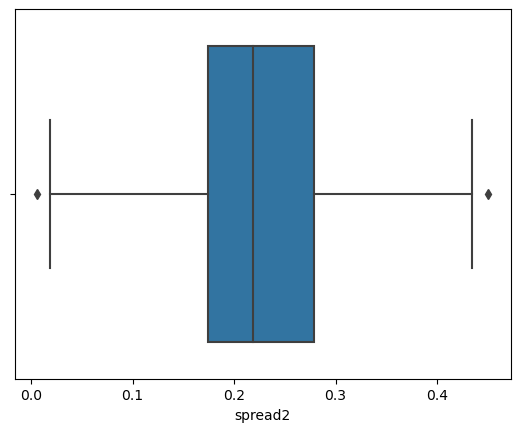

In [54]:
sns.boxplot(x='spread2', data=X) #Before winsorization boxplot with outliers

In [55]:
upper_limit = X['spread2'].quantile(0.95)
lower_limit = X['spread2'].quantile(0.05)
X['spread2'] = np.where(X['spread2']>= upper_limit,
        upper_limit,
        np.where(X['spread2'] <= lower_limit,
        lower_limit,
        X['spread2']))

C:\Users\Karan\AppData\Local\Temp\ipykernel_9492\4198718068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['spread2'] = np.where(X['spread2']>= upper_limit,


<Axes: xlabel='spread2'>

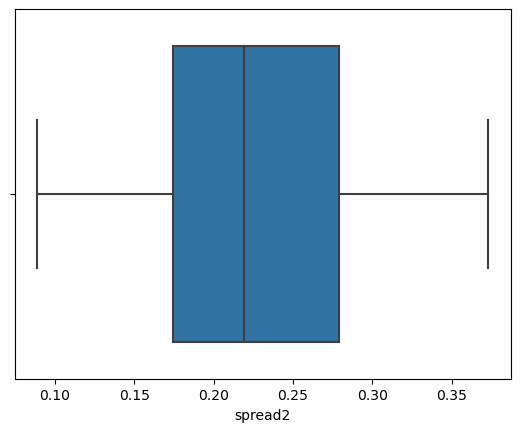

In [56]:
sns.boxplot(x='spread2', data=X) #After winsorization boxplot 

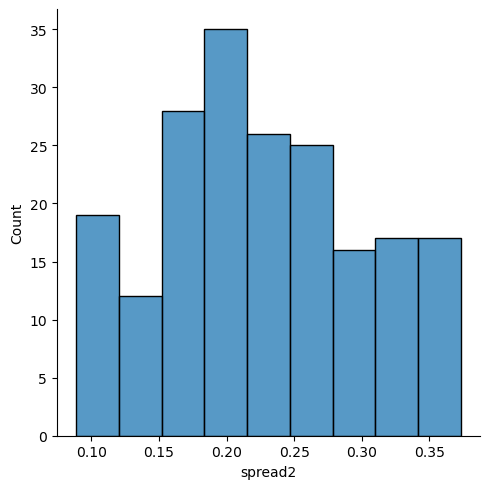

In [57]:
sns.displot(X['spread2']) #After winsorization displot

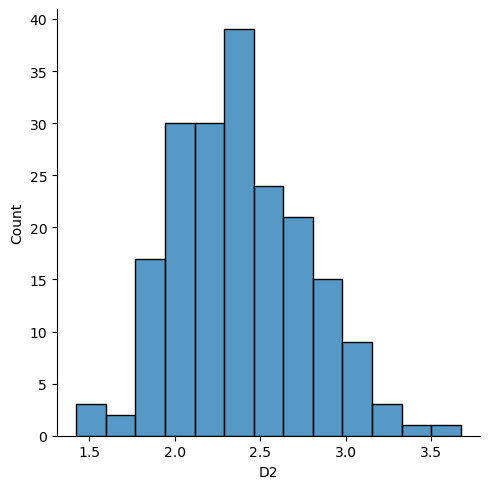

In [58]:
sns.displot(X['D2']) #Before winsorization displot

<Axes: xlabel='D2'>

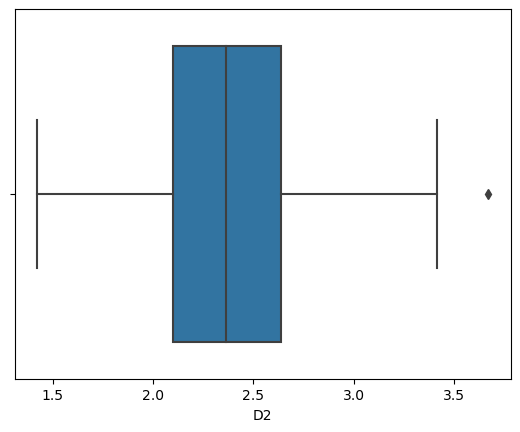

In [59]:
sns.boxplot(x='D2', data=X) #Before winsorization boxplot with outliers

In [60]:
upper_limit = X['D2'].quantile(0.95)
lower_limit = X['D2'].quantile(0.10)
X['D2'] = np.where(X['D2']>= upper_limit,
        upper_limit,
        np.where(X['D2'] <= lower_limit,
        lower_limit,
        X['D2']))

C:\Users\Karan\AppData\Local\Temp\ipykernel_9492\3488061627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['D2'] = np.where(X['D2']>= upper_limit,


<Axes: xlabel='D2'>

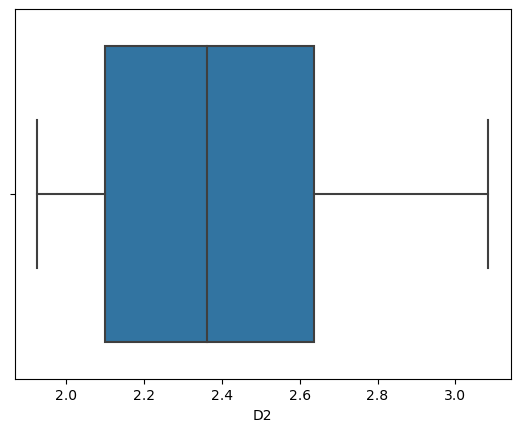

In [61]:
sns.boxplot(x='D2', data=X) #After winsorization boxplot 

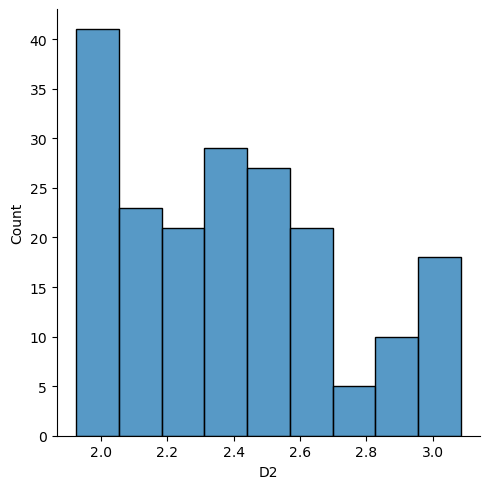

In [62]:
sns.displot(X['D2']) #After winsorization displot

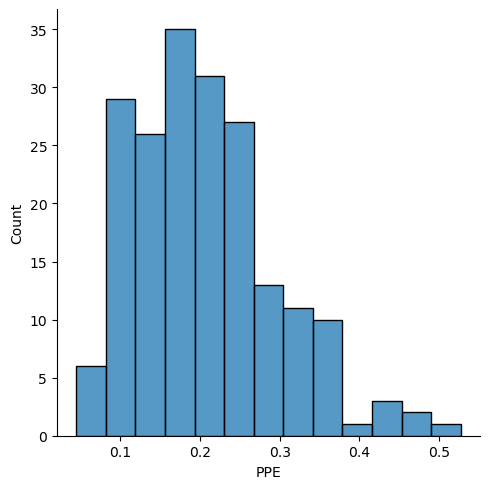

In [63]:
sns.displot(X['PPE']) #Before winsorization displot

<Axes: xlabel='PPE'>

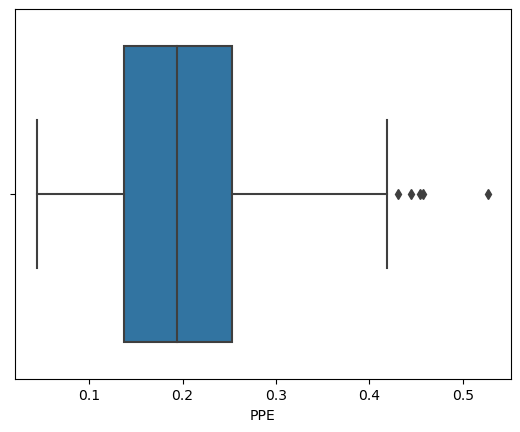

In [64]:
sns.boxplot(x='PPE', data=X) #Before winsorization boxpot with outliers

In [65]:
upper_limit = X['PPE'].quantile(0.95)
lower_limit = X['PPE'].quantile(0.05)
X['PPE'] = np.where(X['PPE']>= upper_limit,
        upper_limit,
        np.where(X['PPE'] <= lower_limit,
        lower_limit,
        X['PPE']))

C:\Users\Karan\AppData\Local\Temp\ipykernel_9492\1364288407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PPE'] = np.where(X['PPE']>= upper_limit,


<Axes: xlabel='PPE'>

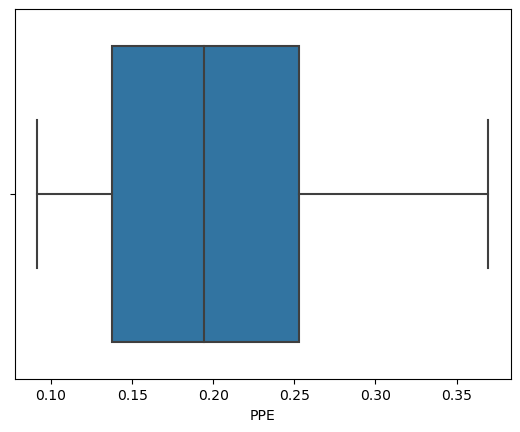

In [66]:
sns.boxplot(x='PPE', data=X) #After winsorization boxplot 

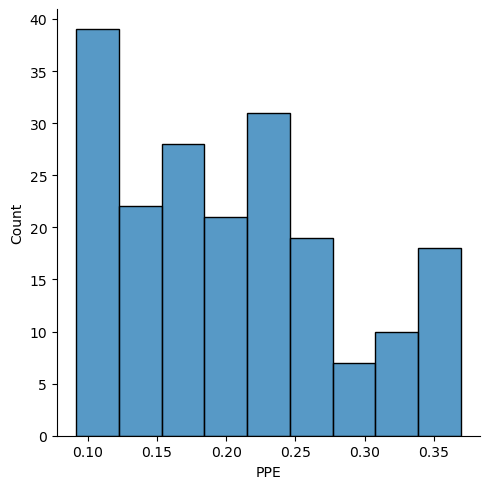

In [67]:
sns.displot(X['PPE']) #After winsorization displot

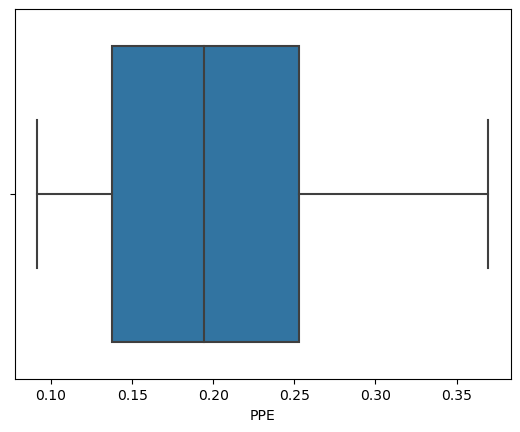

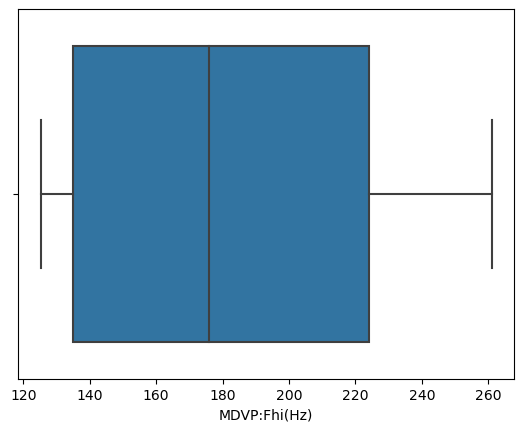

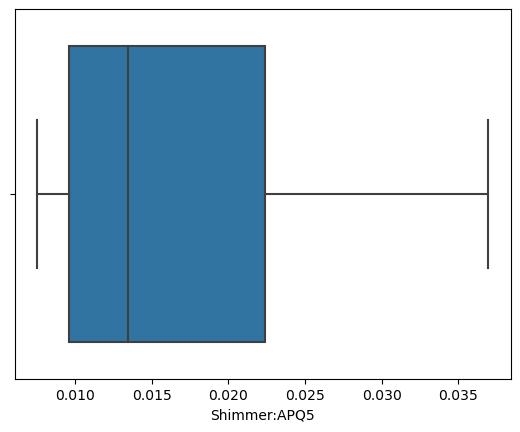

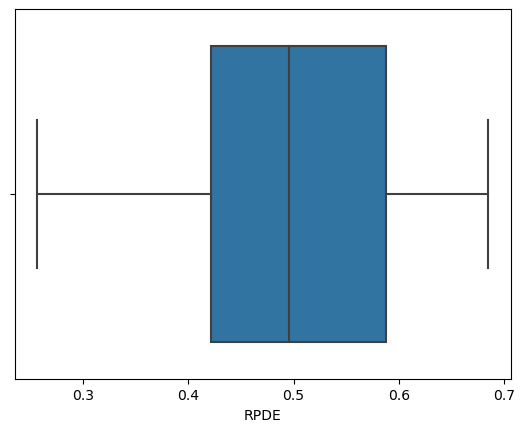

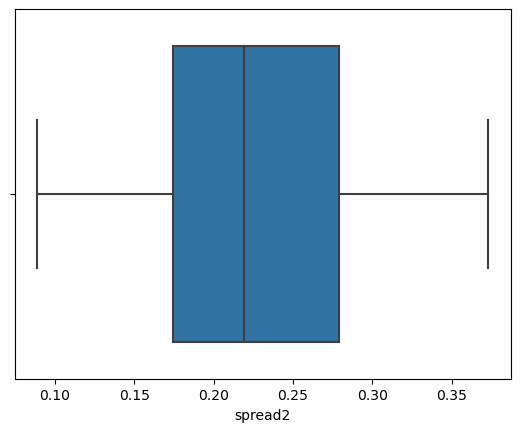

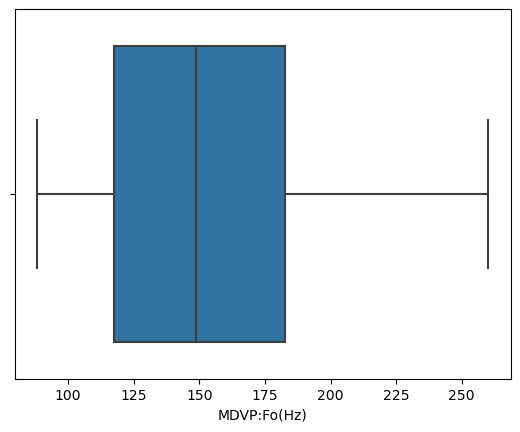

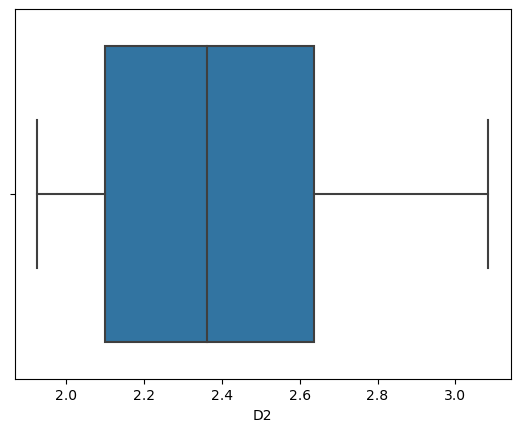

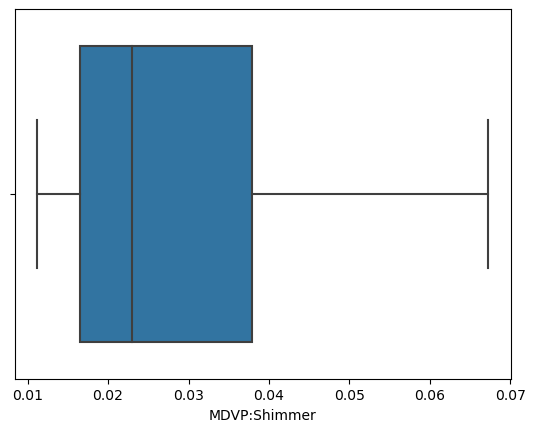

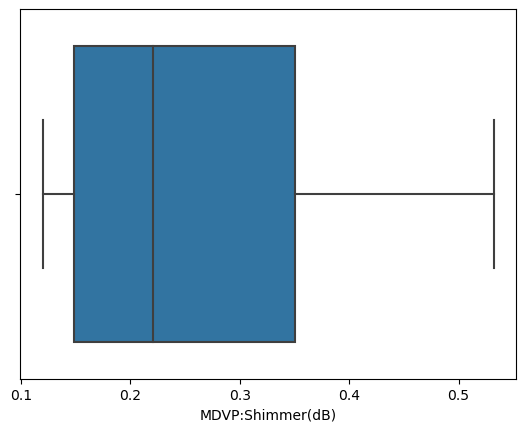

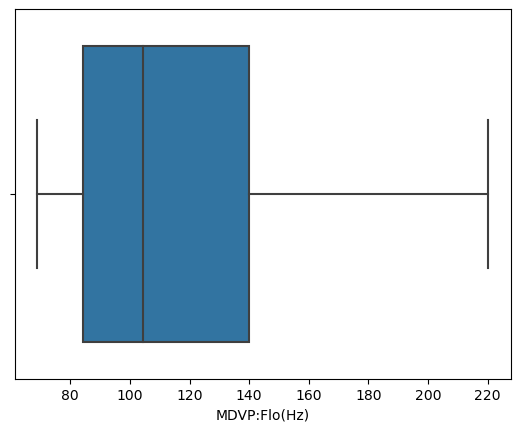

In [68]:
for column in X.columns:
        plt.figure()
        sns.boxplot(x=column, data=X) #Loop for dispalying all the boxplots together, making sure all outliers are handled.

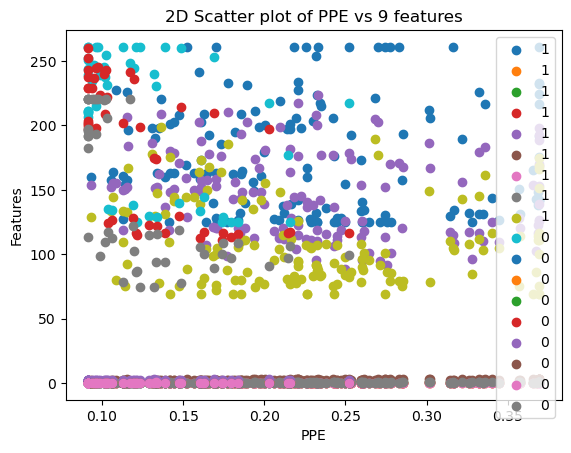

In [69]:
# create a list of the 9 features to plot
#This line creates a list of nine features that will be plotted along the y-axis in the scatter plot.
features = ['MDVP:Fhi(Hz)', 'Shimmer:APQ5', 'RPDE', 'spread2', 'MDVP:Fo(Hz)', 'D2', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'MDVP:Flo(Hz)']

# loop through unique values of 'status' column
for label in Y.unique(): #This line loops through the unique values of the 'status' column in the data. The 'status' column is the target variable we are trying to predict.
   # This code block plots the data points for each feature in the features list. The scatter function is used to plot the data points, where the x-axis is 'PPE' and the y-axis is the feature being plotted. The color of the points corresponds to the unique value of the 'status' column that is being looped through.python
    for feature in features: 
        plt.scatter(X[Y==label]['PPE'], X[Y==label][feature], label=label)

# add plot title and axis labels
plt.title('2D Scatter plot of PPE vs 9 features')
plt.xlabel('PPE')
plt.ylabel('Features')
plt.legend() # The legend function is used to add a legend to the plot, which identifies the unique values of the 'status' column. 
plt.show() # the show function is used to display the plot.

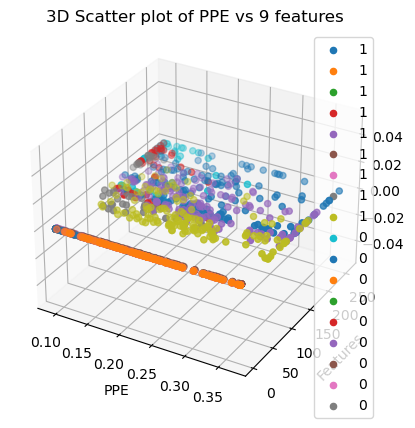

In [70]:
fig = plt.figure() #creates a new empty figure.
ax = fig.add_subplot(111, projection='3d') #creates a new 3D plot axis object.
#defines a list of 9 feature names.
features = ['MDVP:Fhi(Hz)', 'Shimmer:APQ5', 'RPDE', 'spread2', 'MDVP:Fo(Hz)', 'D2', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'MDVP:Flo(Hz)']

#iterates over the unique values of the status column.
for label in Y.unique():
    # plot data points with color based on label
    for feature in features: # iterates over each feature in the list of feature names.
        ax.scatter(X[Y==label]['PPE'], X[Y==label][feature], label=label) # plots a 3D scatter plot for each combination of PPE and the current feature for the current label. The color of each data point is determined by the label value.

# add plot title and axis labels
plt.title('3D Scatter plot of PPE vs 9 features') # sets the title of the plot.
plt.xlabel('PPE') 
plt.ylabel('Features')
plt.legend() ## The legend function is used to add a legend to the plot, which identifies the unique values of the 'status' column. 
plt.show()

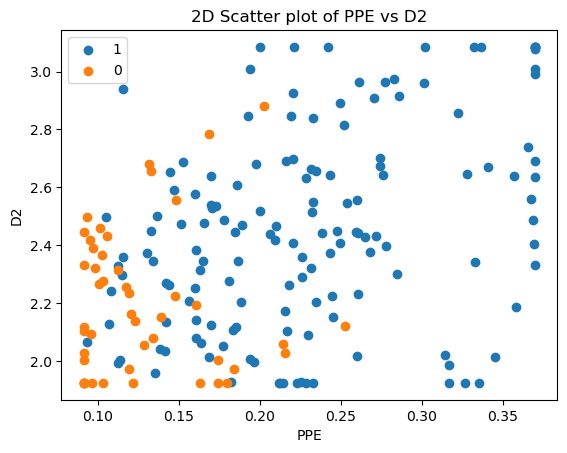

In [71]:
# loop through unique values of 'status' column
for label in Y.unique():
    # Plot a scatter plot of PPE values vs D2 values for the data points with the current label, with the points labeled with the current label.
    plt.scatter(X[Y==label]['PPE'], X[Y==label]['D2'], label=label)

plt.title('2D Scatter plot of PPE vs D2')
plt.xlabel('PPE') 
plt.ylabel('D2')
plt.legend() 
plt.show()


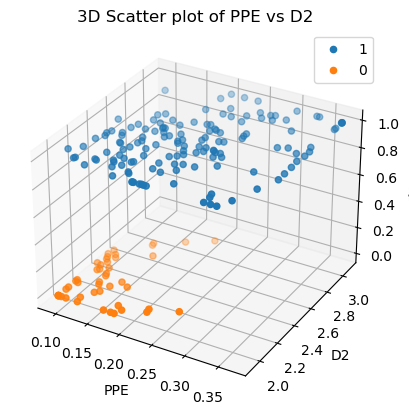

In [72]:
#3D Scatter plot of PPE vs D2
fig = plt.figure() #create a new figure object.
ax = fig.add_subplot(111, projection='3d') # add a 3D subplot to the figure.

# loop through unique values of 'status' column
for label in Y.unique():
    # plot the data points in a 3D scatter plot with x-axis values of 'PPE', y-axis values of 'D2', and z-axis values of 'status' for the current label
    ax.scatter(X[Y==label]['PPE'], X[Y==label]['D2'], Y[Y==label], label=label) 
plt.title('3D Scatter plot of PPE vs D2') #set the title of the plot.
ax.set_xlabel('PPE')  #set the label of the x-axis.
ax.set_ylabel('D2') # set the label of the y-axis.
ax.set_zlabel('status') # set the label of the z-axis.
ax.legend() ## The legend function is used to add a legend to the plot, which identifies the unique values of the 'status' column. 
plt.show() # display the plot.

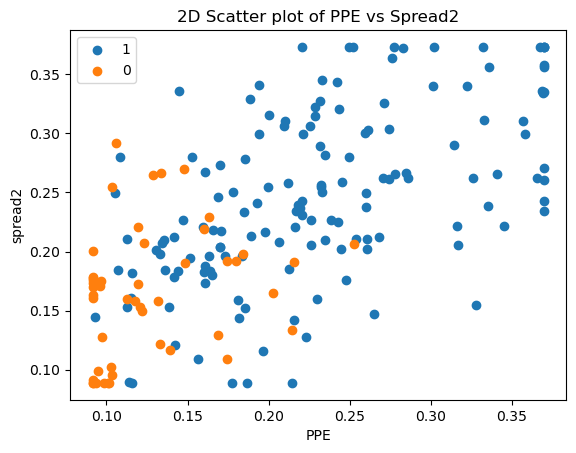

In [73]:
# loop through unique values of 'status' column
for label in Y.unique():
    # Plot a scatter plot of PPE values vs spread2 values for the data points with the current label, with the points labeled with the current label.
    plt.scatter(X[Y==label]['PPE'], X[Y==label]['spread2'], label=label)
 
plt.title('2D Scatter plot of PPE vs Spread2')
plt.xlabel('PPE')
plt.ylabel('spread2')
plt.legend()
plt.show()

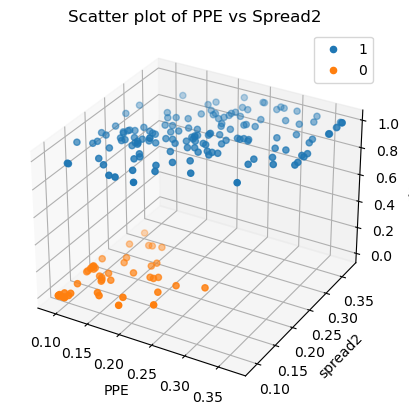

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# loop through unique values of 'status' column
for label in Y.unique():
    # plot data points with color based on label
    ax.scatter(X[Y==label]['PPE'], X[Y==label]['spread2'], Y[Y==label], label=label)
plt.title('Scatter plot of PPE vs Spread2')
ax.set_xlabel('PPE')
ax.set_ylabel('spread2')
ax.set_zlabel('status')
ax.legend()
plt.show()

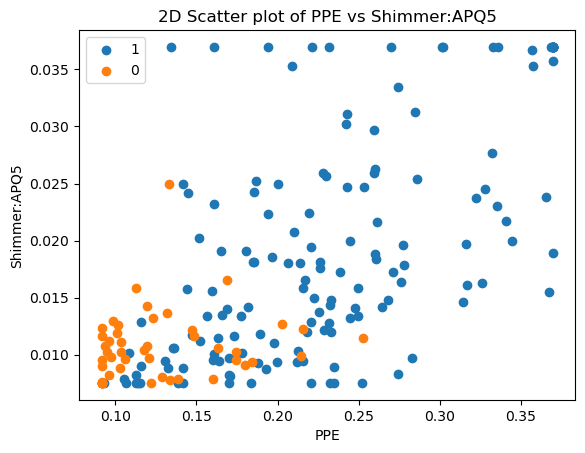

In [75]:
# loop through unique values of 'status' column
for label in Y.unique():
    #Plot a scatter plot of PPE values vs Shimmer:APQ5 values for the data points with the current label, with the points labeled with the current label.
    plt.scatter(X[Y==label]['PPE'], X[Y==label]['Shimmer:APQ5'], label=label)

plt.title('2D Scatter plot of PPE vs Shimmer:APQ5')
plt.xlabel('PPE')
plt.ylabel('Shimmer:APQ5')
plt.legend()
plt.show()

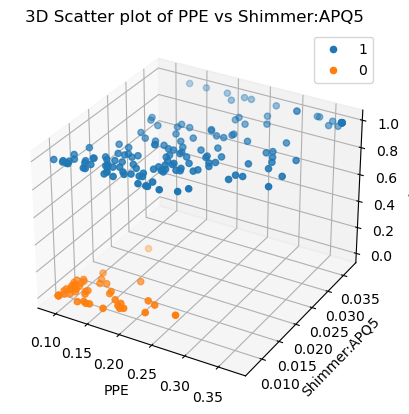

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# loop through unique values of 'status' column
for label in Y.unique():
    # plot data points with color based on label
    ax.scatter(X[Y==label]['PPE'], X[Y==label]['Shimmer:APQ5'], Y[Y==label], label=label)
plt.title('3D Scatter plot of PPE vs Shimmer:APQ5')
ax.set_xlabel('PPE')
ax.set_ylabel('Shimmer:APQ5')
ax.set_zlabel('status')
ax.legend()
plt.show()

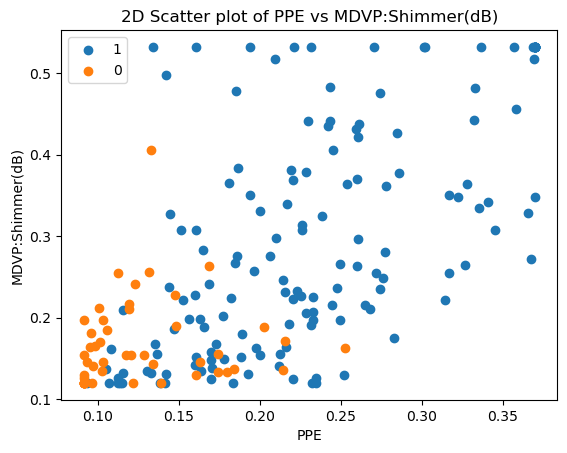

In [77]:
# loop through unique values of 'status' column
for label in Y.unique():
    # plot data points with color based on label
    plt.scatter(X[Y==label]['PPE'], X[Y==label]['MDVP:Shimmer(dB)'], label=label)

plt.title('2D Scatter plot of PPE vs MDVP:Shimmer(dB)')
plt.xlabel('PPE')
plt.ylabel('MDVP:Shimmer(dB)')
plt.legend()
plt.show()

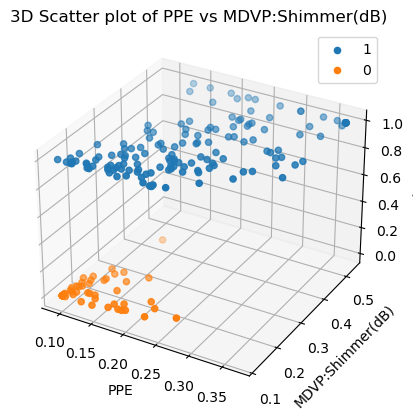

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# loop through unique values of 'status' column
for label in Y.unique():
    # plot data points with color based on label
    ax.scatter(X[Y==label]['PPE'], X[Y==label]['MDVP:Shimmer(dB)'], Y[Y==label], label=label)
plt.title('3D Scatter plot of PPE vs MDVP:Shimmer(dB)')
ax.set_xlabel('PPE')
ax.set_ylabel('MDVP:Shimmer(dB)')
ax.set_zlabel('status')
ax.legend()
plt.show()

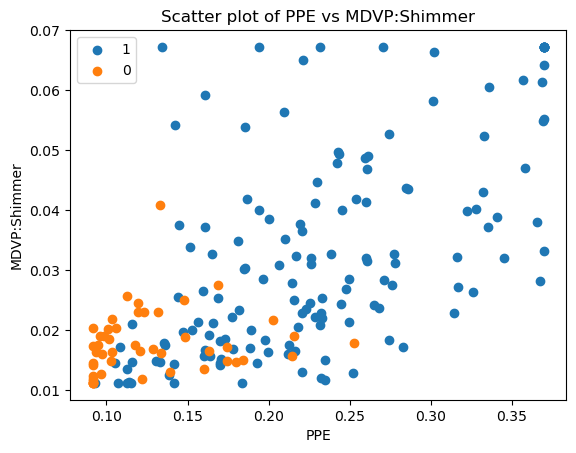

In [79]:
# loop through unique values of 'status' column
for label in Y.unique():
    # plot data points with color based on label
    plt.scatter(X[Y==label]['PPE'], X[Y==label]['MDVP:Shimmer'], label=label)

plt.title('Scatter plot of PPE vs MDVP:Shimmer')
plt.xlabel('PPE')
plt.ylabel('MDVP:Shimmer')
plt.legend()
plt.show()

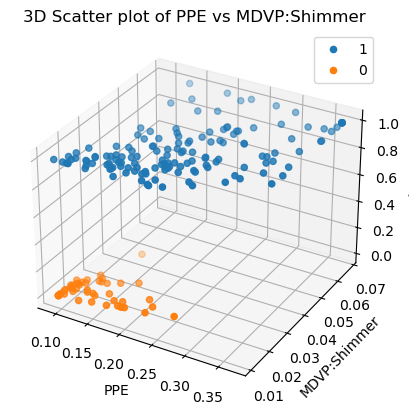

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# loop through unique values of 'status' column
for label in Y.unique():
    # plot data points with color based on label
    ax.scatter(X[Y==label]['PPE'], X[Y==label]['MDVP:Shimmer'], Y[Y==label], label=label)
plt.title('3D Scatter plot of PPE vs MDVP:Shimmer')
ax.set_xlabel('PPE')
ax.set_ylabel('MDVP:Shimmer')
ax.set_zlabel('status')
ax.legend()
plt.show()

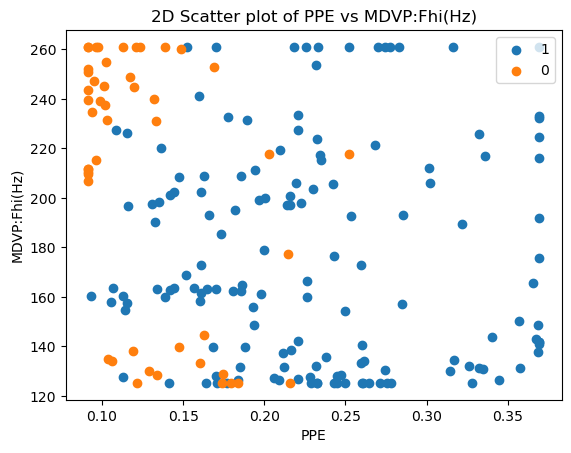

In [81]:
# loop through unique values of 'status' column
for label in Y.unique():
    # plot data points with color based on label
    plt.scatter(X[Y==label]['PPE'], X[Y==label]['MDVP:Fhi(Hz)'], label=label)

plt.title('2D Scatter plot of PPE vs MDVP:Fhi(Hz)')
plt.xlabel('PPE')
plt.ylabel('MDVP:Fhi(Hz)')
plt.legend() 
plt.show()


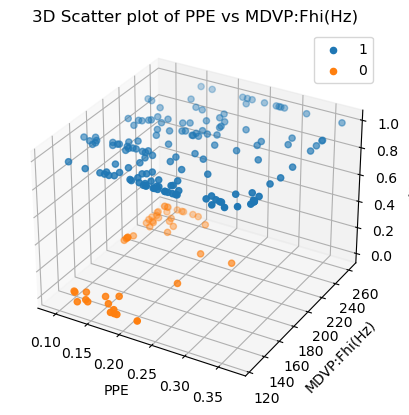

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# loop through unique values of 'status' column
for label in Y.unique():
    # plot data points with color based on label
    ax.scatter(X[Y==label]['PPE'], X[Y==label]['MDVP:Fhi(Hz)'], Y[Y==label], label=label)
plt.title('3D Scatter plot of PPE vs MDVP:Fhi(Hz)')
ax.set_xlabel('PPE')
ax.set_ylabel('MDVP:Fhi(Hz)')
ax.set_zlabel('status')
ax.legend()
plt.show()

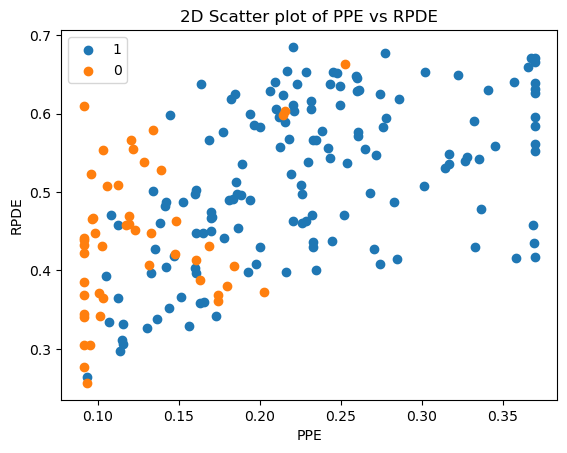

In [83]:
# loop through unique values of 'status' column
for label in Y.unique():
    # plot data points with color based on label
    plt.scatter(X[Y==label]['PPE'], X[Y==label]['RPDE'], label=label)

plt.title('2D Scatter plot of PPE vs RPDE')
plt.xlabel('PPE')
plt.ylabel('RPDE')
plt.legend() 
plt.show()

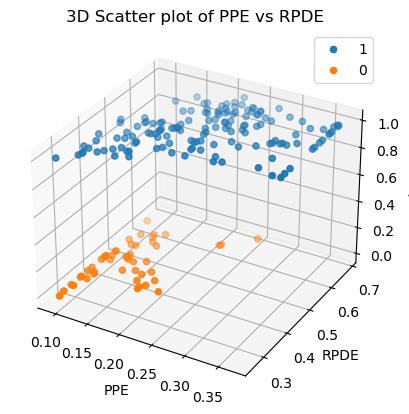

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# loop through unique values of 'status' column
for label in Y.unique():
    # plot data points with color based on label
    ax.scatter(X[Y==label]['PPE'], X[Y==label]['RPDE'], Y[Y==label], label=label)
plt.title('3D Scatter plot of PPE vs RPDE')
ax.set_xlabel('PPE')
ax.set_ylabel('RPDE')
ax.set_zlabel('status')
ax.legend()
plt.show()

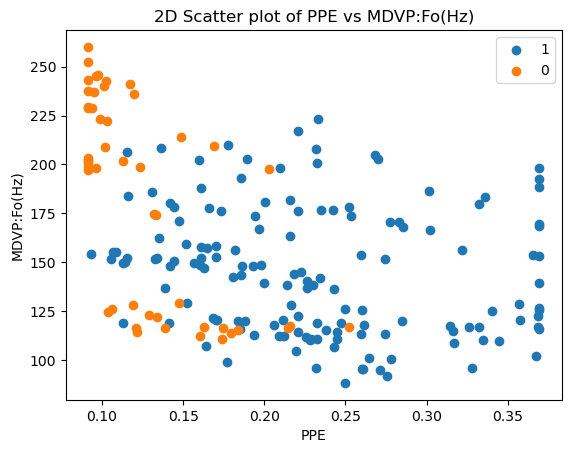

In [85]:
# loop through unique values of 'status' column
for label in Y.unique():
    # plot data points with color based on label
    plt.scatter(X[Y==label]['PPE'], X[Y==label]['MDVP:Fo(Hz)'], label=label)

plt.title('2D Scatter plot of PPE vs MDVP:Fo(Hz)')
plt.xlabel('PPE')
plt.ylabel('MDVP:Fo(Hz)')
plt.legend() 
plt.show()

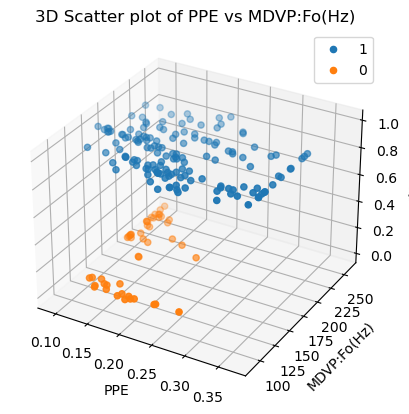

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# loop through unique values of 'status' column
for label in Y.unique():
    # plot data points with color based on label
    ax.scatter(X[Y==label]['PPE'], X[Y==label]['MDVP:Fo(Hz)'], Y[Y==label], label=label)
plt.title('3D Scatter plot of PPE vs MDVP:Fo(Hz)')
ax.set_xlabel('PPE')
ax.set_ylabel('MDVP:Fo(Hz)')
ax.set_zlabel('status')
ax.legend()
plt.show()

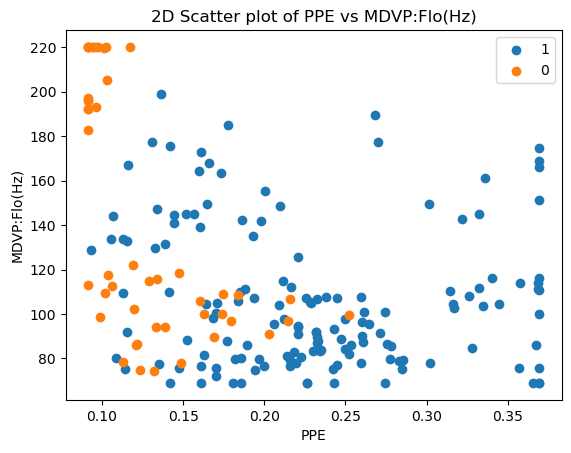

In [87]:
# loop through unique values of 'status' column
for label in Y.unique():
    # plot data points with color based on label
    plt.scatter(X[Y==label]['PPE'], X[Y==label]['MDVP:Flo(Hz)'], label=label)

plt.title('2D Scatter plot of PPE vs MDVP:Flo(Hz)')
plt.xlabel('PPE')
plt.ylabel('MDVP:Flo(Hz)')
plt.legend() 
plt.show()

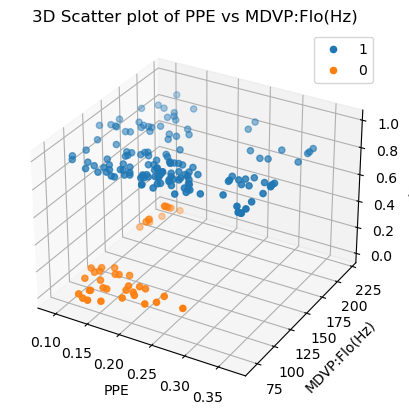

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# loop through unique values of 'status' column
for label in Y.unique():
    # plot data points with color based on label
    ax.scatter(X[Y==label]['PPE'], X[Y==label]['MDVP:Flo(Hz)'], Y[Y==label], label=label)
plt.title('3D Scatter plot of PPE vs MDVP:Flo(Hz)')
ax.set_xlabel('PPE')
ax.set_ylabel('MDVP:Flo(Hz)')
ax.set_zlabel('status')
ax.legend()
plt.show()

In [89]:
""""
I have comment out this function this is used for standardization but the problem is that it is not giving the result between the 0 and 1. So we standardized it min max formula

def Standardize(X): #function named Standardize that takes a single argument named X.
    # Get the column names #This line retrieves the column names of the input X and assigns it to a variable col_names.
    col_names = X.columns #starts a loop that will iterate over each column in X.

    # Standardize each column
    for col in col_names:
        X[col] = (X[col] - X[col].mean()) / X[col].std() # #standardizes the values in the current column by subtracting the mean of the column from each value and then dividing by the standard deviation of the column. The resulting values are then assigned back to the current column in X.

    return X""""" #returns the standardized X dataframe after all the columns have been processed.


'"\nI have comment out this function this is used for standardization but the problem is that it is not giving the result between the 0 and 1. So we standardized it min max formula\n\ndef Standardize(X): #function named Standardize that takes a single argument named X.\n    # Get the column names #This line retrieves the column names of the input X and assigns it to a variable col_names.\n    col_names = X.columns #starts a loop that will iterate over each column in X.\n\n    # Standardize each column\n    for col in col_names:\n        X[col] = (X[col] - X[col].mean()) / X[col].std() # #standardizes the values in the current column by subtracting the mean of the column from each value and then dividing by the standard deviation of the column. The resulting values are then assigned back to the current column in X.\n\n    return X'

In [90]:
""""Standardizes = Standardize(X) #This line calls the Standardize() function defined earlier, passing in the variable X as an argument. The standardized data is returned and assigned to the variable Standardizes.
print(X) # Printing the Standardized Data with coulmn names"""""


'"Standardizes = Standardize(X) #This line calls the Standardize() function defined earlier, passing in the variable X as an argument. The standardized data is returned and assigned to the variable Standardizes.\nprint(X) # Printing the Standardized Data with coulmn names'

In [91]:
def MinMaxScale(X): #This line defines a function called MinMaxScale that takes a single argument X.
    # Get the column names
    col_names = X.columns # This line gets the column names of the input X and assigns them to a variable called col_names

    # Scale each column
    for col in col_names: #This line starts a loop that goes through each column in col_names one at a time and assigns the current column to a variable called col.
        col_min = X[col].min() # gets the minimum value in the current column col of the input X and assigns it to a variable called col_min.
        col_max = X[col].max() # gets the maximum value in the current column col of the input X and assigns it to a variable called col_max.
        X[col] = (X[col] - col_min) / (col_max - col_min) #scales the current column col of the input X by subtracting the minimum value of the column and then dividing by the range of the column (i.e., the difference between the maximum and minimum values).

    return X # returns the scaled input X after all the columns have been scaled.


In [92]:
Standardized = MinMaxScale(X) #this code is scaling the values of each column of the dataset to fit between the range of 0 to 1. 
print(X) # Printing the Standardized Data with coulmn names

          PPE  MDVP:Fhi(Hz)  Shimmer:APQ5      RPDE   spread2  MDVP:Fo(Hz)  \
0    0.694527      0.236104      0.807402  0.369155  0.624843     0.184308   
1    0.996774      0.172371      1.000000  0.470830  0.867924     0.198327   
2    0.867126      0.043173      1.000000  0.404416  0.782040     0.165039   
3    0.997857      0.092969      1.000000  0.416255  0.862849     0.165004   
4    1.000000      0.121771      1.000000  0.375159  0.512395     0.161150   
..        ...           ...           ...       ...       ...          ...   
190  0.149157      0.778826      0.592801  0.447684  0.116472     0.499820   
191  0.278104      0.941172      0.307233  0.408567  0.142329     0.705488   
192  0.144402      0.845322      0.208081  0.352318  0.244861     0.502730   
193  0.114105      1.000000      0.193141  0.454176  0.417218     0.642893   
194  0.204984      0.994652      0.138812  0.481200  0.358171     0.733274   

           D2  MDVP:Shimmer  MDVP:Shimmer(dB)  MDVP:Flo(Hz)  
0

C:\Users\Karan\AppData\Local\Temp\ipykernel_9492\94495442.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = (X[col] - col_min) / (col_max - col_min) #scales the current column col of the input X by subtracting the minimum value of the column and then dividing by the range of the column (i.e., the difference between the maximum and minimum values).


In [93]:
#defines a function called train_test_spilt that takes four parameters: X (the input features), Y (the target variable), test_size (the proportion of the data to use for testing), and random_state (an optional parameter to set a random seed for reproducibility)
def train_test_spilt(X,Y,test_size,random_state=None): 
    X=X.sample(frac=1) #shuffles the rows of the input feature matrix X so that they are in a random order.
    n_train = math.floor(test_size * X.shape[0]) #calculates the number of rows to use for training based on the test_size parameter and the number of rows in the input feature matrix X.
    X_train = X[n_train:] #Selects the rows of the input feature matrix X starting from index n_train to use for training.
    Y_train = Y[n_train:] #selects the corresponding rows of the target variable Y to use for training.
    X_test = X[:n_train] #selects the rows of the input feature matrix X up to index n_train to use for testing.
    Y_test = Y[:n_train] #selects the corresponding rows of the target variable Y to use for testing.
    return X_train, Y_train, X_test,Y_test #our objects: the training input feature matrix X_train, the training target variable Y_train, the testing input feature matrix X_test, and the testing target variable Y_test

In [94]:
X_train, Y_train, X_test, Y_test = train_test_spilt(X, Y, test_size=0.2, random_state=2) #This code randomly splits the dataset X and target variable Y into training and testing sets with a 80:20 ratio, using a random state of 2, and assigns them to X_train, Y_train, X_test, and Y_test.

In [95]:
print(X.shape, X_train.shape, X_test.shape) #Prints the rows and columns of X, X-train and X-test.

(195, 10) (156, 10) (39, 10)


                      Our Own KNN

Accuracy score of training data :  0.7307692307692307
Accuracy score of test data :  0.8717948717948718
Confusion matrix

 [[ 1  5]
 [ 0 33]]

True Positives(TP) =  33

True Negatives(TN) =  1

False Positives(FP) =  5

False Negatives(FN) =  0

Recall:  1.0

Precision:  0.868421052631579

F1 Score:  0.9295774647887324


<Axes: >

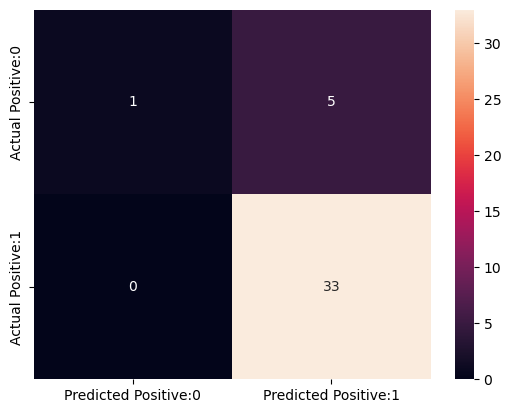

In [96]:
print ('                      Our Own KNN\n')
def knn_predict(X_train, Y_train, X_test, k): #The knn_predict function takes four arguments: X_train, Y_train, X_test, and k.
    y_pred = [] #an empty list is created to store the predicted class labels.
    for i in range(len(X_test)): #The for loop iterates over each data point in X_test.
        dist = np.sqrt(((X_train - X_test.iloc[i])**2).sum(axis=1)) #For each data point in X_test, it calculates the Euclidean distance between that data point and all the data points in X_train.
        indices = np.argsort(dist)[:k] #sorts the distances in ascending order and takes the first k indices.
        labels = Y_train.iloc[indices] #uses these indices to find the corresponding class labels in Y_train.
        y_pred.append(labels.mode()[0]) #appends the most common class label to the y_pred list.
    return y_pred # returns the y_pred list, which contains the predicted class labels for all the data points in X_test.


#function with X_train and Y_train as the training data and X_train again as the test data. It is using k=5 as the value of the hyperparameter 'k' for the k-nearest neighbors algorithm. The predicted labels for the training data are stored in the X_train_prediction variable.
X_train_prediction = knn_predict(X_train, Y_train, X_train, k=5)
train_accuracy = (X_train_prediction == Y_train ).sum() / len(Y_train) #calculating the accuracy of the model on the training data. It is comparing the predicted labels stored in the X_train_prediction variable with the actual labels in Y_train and calculating the number of correct predictions. Then, it divides the number of correct predictions by the total number of data points in the training data to get the accuracy score.
print('Accuracy score of training data : ', train_accuracy)  #printing the accuracy score of the model on the training data.

#function takes in the training set features X_train, training set labels Y_train, test set features X_test, and the number of nearest neighbors k=5. The predicted labels for the test set are stored in X_test_prediction.
X_test_prediction = knn_predict(X_train, Y_train, X_test, k=5) 
test_accuracy = (X_test_prediction == Y_test ).sum() / len(Y_test) #calculates the accuracy score of the model on the test set. It compares the predicted labels in X_test_prediction to the actual labels in Y_test, calculates the number of correct predictions using .sum(), and divides by the total number of predictions using len(). The resulting accuracy score is stored in test_accuracy.
print('Accuracy score of test data : ', test_accuracy) # prints the accuracy score of the model on the test set to the console.

cf_matrix = confusion_matrix(Y_test, X_test_prediction) #Create a confusion matrix by comparing the predicted output values of the test data X_test_prediction with their actual values Y_test.
print('Confusion matrix\n\n', cf_matrix) # Print the confusion matrix.

print('\nTrue Positives(TP) = ', cf_matrix[1,1]) #Print the number of true positives, which are the number of correct predictions of the positive class.
print('\nTrue Negatives(TN) = ', cf_matrix[0,0]) #Print the number of true negatives, which are the number of correct predictions of the negative class.
print('\nFalse Positives(FP) = ', cf_matrix[0,1]) #Print the number of false positives, which are the number of incorrect predictions of the positive class.
print('\nFalse Negatives(FN) = ', cf_matrix[1,0]) #Print the number of false negatives, which are the number of incorrect predictions of the negative class.

tn, fp, fn, tp = cf_matrix.ravel() #Assigns four variables to the values of the four cells of the confusion matrix using the ravel() method.

recall =  tp/(tp+fn) #calculates the recall using the formula TP / (TP + FN). Recall measures the proportion of actual positive cases that were correctly identified by the model.
print('\nRecall: ',recall) #Printing The Recall Percentage.

precision = tp/(tp+fp) #calculates the precision using the formula TP / (TP + FP). Precision measures the proportion of predicted positive cases that were actually positive.
print('\nPrecision: ', precision) # Printing the precision Percentage. 

F1 = 2 * ((precision*recall) / (precision+recall)) #calculates the F1 score using the formula 2 * (Precision * Recall) / (Precision + Recall). The F1 score is the harmonic mean of precision and recall, and it provides a balanced measure of the model's performance.
print ('\nF1 Score: ',F1) #Printing the F1 Score.

#The pd.DataFrame() function from pandas library creates a new dataframe object cm_matrix.
#The data parameter is set to cf_matrix which is a confusion matrix.
cm_matrix = pd.DataFrame(data=cf_matrix, columns=['Predicted Positive:0', 'Predicted Positive:1'], #The columns parameter is set to a list of two strings, 'Predicted Positive:0' and 'Predicted Positive:1' which will be used as column labels in the new dataframe.
                                 index=['Actual Positive:0', 'Actual Positive:1']) #The index parameter is set to a list of two strings, 'Actual Positive:0' and 'Actual Positive:1' which will be used as index labels in the new dataframe
sns.heatmap(cm_matrix, annot=True) #Creates a heatmap plot of confusion matrix. The annot parameter is set to True to display the values of the confusion matrix in each cell of the heatmap.

                   SVM linear Kernel
Accuracy score of training data :  0.7307692307692307
Accuracy score of test data :  0.8461538461538461
K-fold with 10 folds:  0.8084210526315789
Confusion matrix

 [[ 0  6]
 [ 0 33]]

True Positives(TP) =  33

True Negatives(TN) =  0

False Positives(FP) =  6

False Negatives(FN) =  0

Recall:  1.0

Precision:  0.8461538461538461

F1 Score:  0.9166666666666666


<Axes: >

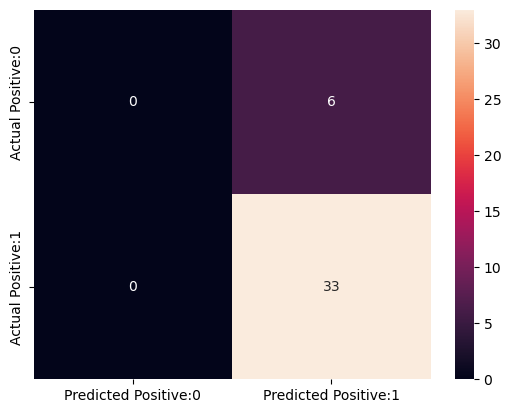

In [97]:
print('                   SVM linear Kernel')

#The "kernel" parameter is set to "linear", which means that this model will try to draw a straight line to separate the different categories of data.
svm_linear = svm.SVC(kernel='linear',C=100) #Createing a learning model called "svm_linear". This model uses a type of algorithm called "SVC".
svm_linear.fit(X_train, Y_train) #Model is trained on some data using the ".fit()" method. The training data is split into two parts: the input data ("X_train") and the output data ("Y_train"). The model is trained to learn the relationship between the input data and the output data, so that it can predict the output values for new input data that it hasn't seen before.

X_train_prediction = svm_linear.predict(X_train) #"Make predictions on the input data used for training stored in the "X_train" variable. The predicted output values are stored in a new variable "X_train_prediction"
train_accuracy = (X_train_prediction == Y_train ).sum() / len(Y_train) #calculating the accuracy of the model on the training data. It is comparing the predicted labels stored in the X_train_prediction variable with the actual labels in Y_train and calculating the number of correct predictions. Then, it divides the number of correct predictions by the total number of data points in the training data to get the accuracy score.
print('Accuracy score of training data : ', train_accuracy) # Printing the Training Data Accuracy. The accuracy score represents the percentage of training data that was correctly predicted by the model. 

X_test_prediction = svm_linear.predict(X_test) #"Make predictions on the input data used for testing stored in the "X_test" variable. The predicted output values are stored in a new variable "X_test_prediction"
test_accuracy = (X_test_prediction == Y_test ).sum() / len(Y_test) #calculates the accuracy score of the model on the test set. It compares the predicted labels in X_test_prediction to the actual labels in Y_test, calculates the number of correct predictions using .sum(), and divides by the total number of predictions using len(). The resulting accuracy score is stored in test_accuracy.
print('Accuracy score of test data : ', test_accuracy)#Printing the Testing Data Accuracy. The accuracy score represents the percentage of test data that was correctly predicted by the model.

#The "cross_val_score()" function splits the input data into 10 parts and trains the model on 9 of the folds while using the remaining fold for testing. This process is repeated 10 times, so that each fold is used for testing once. The function then returns an array of 10 scores, one for each fold.
scores = cross_val_score(svm_linear, X, Y, cv=10) # This function takes as input the model ("svm_linear"), the input data ("X"), the output data ("Y"), and the number of folds for cross-validation ("cv=10"). In this case, the number of folds is set to 10.
kfold= np.sum(scores) / len(scores) #calculates the mean score across all 10 folds by summing up the scores using "np.sum(scores)" and dividing by the number of scores using "/ len(scores)". This mean score represents the overall performance of the "svm_linear" model across all 10 folds of the cross-validation.
print('K-fold with 10 folds: ',kfold) #Prinitng The Mean Score. This mean score represents the overall performance of the "svm_linear" model across all 10 folds of the cross-validation.

cf_matrix = confusion_matrix(Y_test, X_test_prediction) #Create a confusion matrix by comparing the predicted output values of the test data X_test_prediction with their actual values Y_test.
print('Confusion matrix\n\n', cf_matrix) # Print the confusion matrix.

print('\nTrue Positives(TP) = ', cf_matrix[1,1]) #Print the number of true positives, which are the number of correct predictions of the positive class.
print('\nTrue Negatives(TN) = ', cf_matrix[0,0]) #Print the number of true negatives, which are the number of correct predictions of the negative class.
print('\nFalse Positives(FP) = ', cf_matrix[0,1]) #Print the number of false positives, which are the number of incorrect predictions of the positive class.
print('\nFalse Negatives(FN) = ', cf_matrix[1,0]) #Print the number of false negatives, which are the number of incorrect predictions of the negative class.

tn, fp, fn, tp = cf_matrix.ravel() #Assigns four variables to the values of the four cells of the confusion matrix using the ravel() method.

recall =  tp/(tp+fn) #calculates the recall using the formula TP / (TP + FN). Recall measures the proportion of actual positive cases that were correctly identified by the model.
print('\nRecall: ',recall) #Printing The Recall Percentage.

precision = tp/(tp+fp) #calculates the precision using the formula TP / (TP + FP). Precision measures the proportion of predicted positive cases that were actually positive.
print('\nPrecision: ', precision) # Printing the precision Percentage. 

F1 = 2 * ((precision*recall) / (precision+recall)) #calculates the F1 score using the formula 2 * (Precision * Recall) / (Precision + Recall). The F1 score is the harmonic mean of precision and recall, and it provides a balanced measure of the model's performance.
print ('\nF1 Score: ',F1) #Printing the F1 Score.

#The pd.DataFrame() function from pandas library creates a new dataframe object cm_matrix.
#The data parameter is set to cf_matrix which is a confusion matrix.
cm_matrix = pd.DataFrame(data=cf_matrix, columns=['Predicted Positive:0', 'Predicted Positive:1'], #The columns parameter is set to a list of two strings, 'Predicted Positive:0' and 'Predicted Positive:1' which will be used as column labels in the new dataframe.
                                 index=['Actual Positive:0', 'Actual Positive:1']) #The index parameter is set to a list of two strings, 'Actual Positive:0' and 'Actual Positive:1' which will be used as index labels in the new dataframe
sns.heatmap(cm_matrix, annot=True) #Creates a heatmap plot of confusion matrix. The annot parameter is set to True to display the values of the confusion matrix in each cell of the heatmap.

                   SVM rbf Kernel
Accuracy score of training data :  0.9102564102564102
Accuracy score of test data :  0.6666666666666666
K-fold with 10 folds:  0.8084210526315789
Confusion matrix

 [[ 2  4]
 [ 9 24]]

True Positives(TP) =  24

True Negatives(TN) =  2

False Positives(FP) =  4

False Negatives(FN) =  9

Recall:  0.7272727272727273

Precision:  0.8571428571428571

F1 Score:  0.7868852459016394


<Axes: >

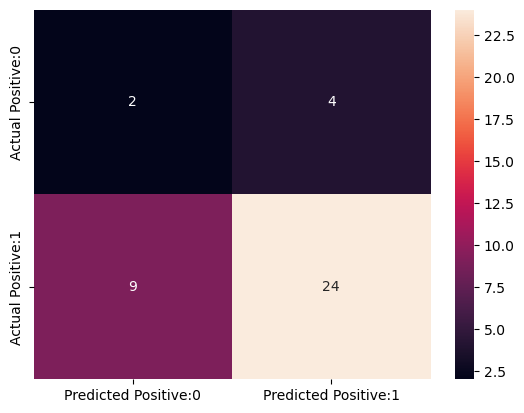

In [98]:
print('                   SVM rbf Kernel')

#Finding the hyperplane that best separates the two classes of data points in the feature space.
svm_rbf = svm.SVC(kernel='rbf',gamma=0.7,C=100) #Sets the kernel parameter to 'rbf' stands for radial basis function. It also sets the gamma parameter to 0.7, which is used to control the shape of the decision boundary.
svm_rbf.fit(X_train, Y_train)#Model is trained on some data using the ".fit()" method. The training data is split into two parts: the input data ("X_train") and the output data ("Y_train"). The model is trained to learn the relationship between the input data and the output data, so that it can predict the output values for new input data that it hasn't seen before.

X_train_prediction = svm_rbf.predict(X_train)#"Make predictions on the input data used for training stored in the "X_train" variable. The predicted output values are stored in a new variable "X_train_prediction"
train_accuracy = (X_train_prediction == Y_train ).sum() / len(Y_train) #calculating the accuracy of the model on the training data. It is comparing the predicted labels stored in the X_train_prediction variable with the actual labels in Y_train and calculating the number of correct predictions. Then, it divides the number of correct predictions by the total number of data points in the training data to get the accuracy score.
print('Accuracy score of training data : ', train_accuracy) # Printing the Training Data Accuracy. The accuracy score represents the percentage of training data that was correctly predicted by the model. 

X_test_prediction = svm_rbf.predict(X_test)#"Make predictions on the input data used for testing stored in the "X_test" variable. The predicted output values are stored in a new variable "X_test_prediction"
test_accuracy = (X_test_prediction == Y_test ).sum() / len(Y_test) #calculates the accuracy score of the model on the test set. It compares the predicted labels in X_test_prediction to the actual labels in Y_test, calculates the number of correct predictions using .sum(), and divides by the total number of predictions using len(). The resulting accuracy score is stored in test_accuracy.
print('Accuracy score of test data : ', test_accuracy)#Printing the Testing Data Accuracy. The accuracy score represents the percentage of test data that was correctly predicted by the model.

#The "cross_val_score()" function splits the input data into 10 parts and trains the model on 9 of the folds while using the remaining fold for testing. This process is repeated 10 times, so that each fold is used for testing once. The function then returns an array of 10 scores, one for each fold.
scores = cross_val_score(svm_linear, X, Y, cv=10) # This function takes as input the model ("svm_linear"), the input data ("X"), the output data ("Y"), and the number of folds for cross-validation ("cv=10"). In this case, the number of folds is set to 10.
kfold= np.sum(scores) / len(scores) #calculates the mean score across all 10 folds by summing up the scores using "np.sum(scores)" and dividing by the number of scores using "/ len(scores)". This mean score represents the overall performance of the "svm_linear" model across all 10 folds of the cross-validation.
print('K-fold with 10 folds: ',kfold) #Prinitng The Mean Score. This mean score represents the overall performance of the "svm_linear" model across all 10 folds of the cross-validation.

cf_matrix = confusion_matrix(Y_test, X_test_prediction) #Create a confusion matrix by comparing the predicted output values of the test data X_test_prediction with their actual values Y_test.
print('Confusion matrix\n\n', cf_matrix) # Print the confusion matrix.

print('\nTrue Positives(TP) = ', cf_matrix[1,1]) #Print the number of true positives, which are the number of correct predictions of the positive class.
print('\nTrue Negatives(TN) = ', cf_matrix[0,0]) #Print the number of true negatives, which are the number of correct predictions of the negative class.
print('\nFalse Positives(FP) = ', cf_matrix[0,1]) #Print the number of false positives, which are the number of incorrect predictions of the positive class.
print('\nFalse Negatives(FN) = ', cf_matrix[1,0]) #Print the number of false negatives, which are the number of incorrect predictions of the negative class.

tn, fp, fn, tp = cf_matrix.ravel() #Assigns four variables to the values of the four cells of the confusion matrix using the ravel() method.

recall =  tp/(tp+fn) #calculates the recall using the formula TP / (TP + FN). Recall measures the proportion of actual positive cases that were correctly identified by the model.
print('\nRecall: ',recall) #Printing The Recall Percentage.

precision = tp/(tp+fp) #calculates the precision using the formula TP / (TP + FP). Precision measures the proportion of predicted positive cases that were actually positive.
print('\nPrecision: ', precision) # Printing the precision Percentage. 

F1 = 2 * ((precision*recall) / (precision+recall)) #calculates the F1 score using the formula 2 * (Precision * Recall) / (Precision + Recall). The F1 score is the harmonic mean of precision and recall, and it provides a balanced measure of the model's performance.
print ('\nF1 Score: ',F1) #Printing the F1 Score.

#The pd.DataFrame() function from pandas library creates a new dataframe object cm_matrix.
#The data parameter is set to cf_matrix which is a confusion matrix.
cm_matrix = pd.DataFrame(data=cf_matrix, columns=['Predicted Positive:0', 'Predicted Positive:1'], #The columns parameter is set to a list of two strings, 'Predicted Positive:0' and 'Predicted Positive:1' which will be used as column labels in the new dataframe.
                                 index=['Actual Positive:0', 'Actual Positive:1']) #The index parameter is set to a list of two strings, 'Actual Positive:0' and 'Actual Positive:1' which will be used as index labels in the new dataframe
sns.heatmap(cm_matrix, annot=True) #Creates a heatmap plot of confusion matrix. The annot parameter is set to True to display the values of the confusion matrix in each cell of the heatmap.

                   SVM Polynomial Kernel
Accuracy score of training data :  0.9423076923076923
Accuracy score of test data :  0.6923076923076923
K-fold with 10 folds:  0.8084210526315789
Confusion matrix

 [[ 3  3]
 [ 9 24]]

True Positives(TP) =  24

True Negatives(TN) =  3

False Positives(FP) =  3

False Negatives(FN) =  9

Recall:  0.7272727272727273

Precision:  0.8888888888888888

F1 Score:  0.7999999999999999


<Axes: >

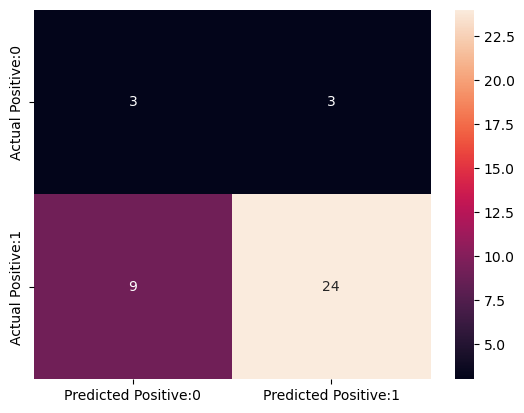

In [99]:
print('                   SVM Polynomial Kernel')
#the degree of the polynomial kernel is set to 3, which means that the decision boundary will be a cubic curve. This may be useful if the data points are arranged in a way that cannot be easily separated by a linear boundary, but can be separated by a more complex curve. However, using a higher degree polynomial can also lead to overfitting the training data and performing poorly on new, unseen data.
svm_polynomial = svm.SVC(kernel='poly',degree=3,C=100) #creates an instance of the support vector machine (SVM) classifier with a polynomial kernel function. The degree of the polynomial kernel is set to 3.
svm_polynomial.fit(X_train, Y_train) ##Model is trained on some data using the ".fit()" method. The training data is split into two parts: the input data ("X_train") and the output data ("Y_train"). The model is trained to learn the relationship between the input data and the output data, so that it can predict the output values for new input data that it hasn't seen before.

X_train_prediction = svm_polynomial.predict(X_train)#"Make predictions on the input data used for training stored in the "X_train" variable. The predicted output values are stored in a new variable "X_train_prediction"
train_accuracy = (X_train_prediction == Y_train ).sum() / len(Y_train)#calculating the accuracy of the model on the training data. It is comparing the predicted labels stored in the X_train_prediction variable with the actual labels in Y_train and calculating the number of correct predictions. Then, it divides the number of correct predictions by the total number of data points in the training data to get the accuracy score.
print('Accuracy score of training data : ', train_accuracy) # Printing the Training Data Accuracy. The accuracy score represents the percentage of training data that was correctly predicted by the model. 

X_test_prediction = svm_polynomial.predict(X_test)#"Make predictions on the input data used for testing stored in the "X_test" variable. The predicted output values are stored in a new variable "X_test_prediction"
test_accuracy = (X_test_prediction == Y_test ).sum() / len(Y_test) #calculates the accuracy score of the model on the test set. It compares the predicted labels in X_test_prediction to the actual labels in Y_test, calculates the number of correct predictions using .sum(), and divides by the total number of predictions using len(). The resulting accuracy score is stored in test_accuracy.
print('Accuracy score of test data : ', test_accuracy)#Printing the Testing Data Accuracy. The accuracy score represents the percentage of test data that was correctly predicted by the model.


#The "cross_val_score()" function splits the input data into 10 parts and trains the model on 9 of the folds while using the remaining fold for testing. This process is repeated 10 times, so that each fold is used for testing once. The function then returns an array of 10 scores, one for each fold.
scores = cross_val_score(svm_linear, X, Y, cv=10) # This function takes as input the model ("svm_linear"), the input data ("X"), the output data ("Y"), and the number of folds for cross-validation ("cv=10"). In this case, the number of folds is set to 10.
kfold= np.sum(scores) / len(scores) #calculates the mean score across all 10 folds by summing up the scores using "np.sum(scores)" and dividing by the number of scores using "/ len(scores)". This mean score represents the overall performance of the "svm_linear" model across all 10 folds of the cross-validation.
print('K-fold with 10 folds: ',kfold) #Prinitng The Mean Score. This mean score represents the overall performance of the "svm_linear" model across all 10 folds of the cross-validation.

cf_matrix = confusion_matrix(Y_test, X_test_prediction) #Create a confusion matrix by comparing the predicted output values of the test data X_test_prediction with their actual values Y_test.
print('Confusion matrix\n\n', cf_matrix) # Print the confusion matrix.

print('\nTrue Positives(TP) = ', cf_matrix[1,1]) #Print the number of true positives, which are the number of correct predictions of the positive class.
print('\nTrue Negatives(TN) = ', cf_matrix[0,0]) #Print the number of true negatives, which are the number of correct predictions of the negative class.
print('\nFalse Positives(FP) = ', cf_matrix[0,1]) #Print the number of false positives, which are the number of incorrect predictions of the positive class.
print('\nFalse Negatives(FN) = ', cf_matrix[1,0]) #Print the number of false negatives, which are the number of incorrect predictions of the negative class.

tn, fp, fn, tp = cf_matrix.ravel() #Assigns four variables to the values of the four cells of the confusion matrix using the ravel() method.

recall =  tp/(tp+fn) #calculates the recall using the formula TP / (TP + FN). Recall measures the proportion of actual positive cases that were correctly identified by the model.
print('\nRecall: ',recall) #Printing The Recall Percentage.

precision = tp/(tp+fp) #calculates the precision using the formula TP / (TP + FP). Precision measures the proportion of predicted positive cases that were actually positive.
print('\nPrecision: ', precision) # Printing the precision Percentage. 

F1 = 2 * ((precision*recall) / (precision+recall)) #calculates the F1 score using the formula 2 * (Precision * Recall) / (Precision + Recall). The F1 score is the harmonic mean of precision and recall, and it provides a balanced measure of the model's performance.
print ('\nF1 Score: ',F1) #Printing the F1 Score.

#The pd.DataFrame() function from pandas library creates a new dataframe object cm_matrix.
#The data parameter is set to cf_matrix which is a confusion matrix.
cm_matrix = pd.DataFrame(data=cf_matrix, columns=['Predicted Positive:0', 'Predicted Positive:1'], #The columns parameter is set to a list of two strings, 'Predicted Positive:0' and 'Predicted Positive:1' which will be used as column labels in the new dataframe.
                                 index=['Actual Positive:0', 'Actual Positive:1']) #The index parameter is set to a list of two strings, 'Actual Positive:0' and 'Actual Positive:1' which will be used as index labels in the new dataframe
sns.heatmap(cm_matrix, annot=True) #Creates a heatmap plot of confusion matrix. The annot parameter is set to True to display the values of the confusion matrix in each cell of the heatmap.

           Percetron
Accuracy score of training data :  0.7307692307692307
Accuracy score of test data :  0.8205128205128205
K-fold with 10 folds:  0.8084210526315789
Confusion matrix

 [[ 0  6]
 [ 1 32]]

True Positives(TP) =  32

True Negatives(TN) =  0

False Positives(FP) =  6

False Negatives(FN) =  1

Recall:  0.9696969696969697

Precision:  0.8421052631578947

F1 Score:  0.9014084507042254


<Axes: >

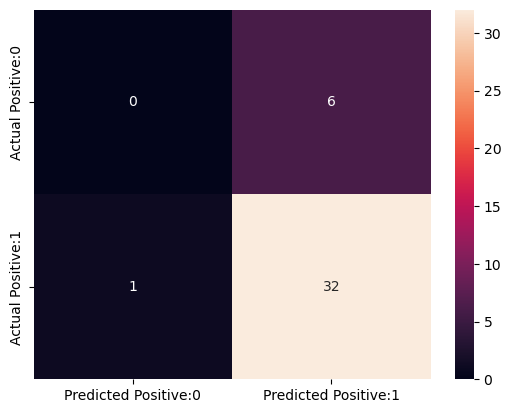

In [100]:
print ("           Percetron")

#Perceptron is used for binary classification problems where the goal is to predict whether an input belongs to one class or another. It tries to find a hyperplane that can separate the two classes in the feature space.
perceptron = Perceptron() # Creates a new Perceptron object that can be used to train and predict using a perceptron classifier.
perceptron.fit(X_train, Y_train)#Model is trained on some data using the ".fit()" method. The training data is split into two parts: the input data ("X_train") and the output data ("Y_train"). The model is trained to learn the relationship between the input data and the output data, so that it can predict the output values for new input data that it hasn't seen before.

X_train_prediction = perceptron.predict(X_train)#"Make predictions on the input data used for training stored in the "X_train" variable. The predicted output values are stored in a new variable "X_train_prediction"
train_accuracy = (X_train_prediction == Y_train ).sum() / len(Y_train) #calculating the accuracy of the model on the training data. It is comparing the predicted labels stored in the X_train_prediction variable with the actual labels in Y_train and calculating the number of correct predictions. Then, it divides the number of correct predictions by the total number of data points in the training data to get the accuracy score.
print('Accuracy score of training data : ', train_accuracy) # Printing the Training Data Accuracy. The accuracy score represents the percentage of training data that was correctly predicted by the model. 

X_test_prediction = perceptron.predict(X_test)#"Make predictions on the input data used for testing stored in the "X_test" variable. The predicted output values are stored in a new variable "X_test_prediction"
test_accuracy = (X_test_prediction == Y_test ).sum() / len(Y_test) #calculates the accuracy score of the model on the test set. It compares the predicted labels in X_test_prediction to the actual labels in Y_test, calculates the number of correct predictions using .sum(), and divides by the total number of predictions using len(). The resulting accuracy score is stored in test_accuracy.
print('Accuracy score of test data : ', test_accuracy)#Printing the Testing Data Accuracy. The accuracy score represents the percentage of test data that was correctly predicted by the model.


#The "cross_val_score()" function splits the input data into 10 parts and trains the model on 9 of the folds while using the remaining fold for testing. This process is repeated 10 times, so that each fold is used for testing once. The function then returns an array of 10 scores, one for each fold.
scores = cross_val_score(svm_linear, X, Y, cv=10) # This function takes as input the model ("svm_linear"), the input data ("X"), the output data ("Y"), and the number of folds for cross-validation ("cv=10"). In this case, the number of folds is set to 10.
kfold= np.sum(scores) / len(scores) #calculates the mean score across all 10 folds by summing up the scores using "np.sum(scores)" and dividing by the number of scores using "/ len(scores)". This mean score represents the overall performance of the "svm_linear" model across all 10 folds of the cross-validation.
print('K-fold with 10 folds: ',kfold) #Prinitng The Mean Score. This mean score represents the overall performance of the "svm_linear" model across all 10 folds of the cross-validation.

cf_matrix = confusion_matrix(Y_test, X_test_prediction) #Create a confusion matrix by comparing the predicted output values of the test data X_test_prediction with their actual values Y_test.
print('Confusion matrix\n\n', cf_matrix) # Print the confusion matrix.

print('\nTrue Positives(TP) = ', cf_matrix[1,1]) #Print the number of true positives, which are the number of correct predictions of the positive class.
print('\nTrue Negatives(TN) = ', cf_matrix[0,0]) #Print the number of true negatives, which are the number of correct predictions of the negative class.
print('\nFalse Positives(FP) = ', cf_matrix[0,1]) #Print the number of false positives, which are the number of incorrect predictions of the positive class.
print('\nFalse Negatives(FN) = ', cf_matrix[1,0]) #Print the number of false negatives, which are the number of incorrect predictions of the negative class.

tn, fp, fn, tp = cf_matrix.ravel() #Assigns four variables to the values of the four cells of the confusion matrix using the ravel() method.

recall =  tp/(tp+fn) #calculates the recall using the formula TP / (TP + FN). Recall measures the proportion of actual positive cases that were correctly identified by the model.
print('\nRecall: ',recall) #Printing The Recall Percentage.

precision = tp/(tp+fp) #calculates the precision using the formula TP / (TP + FP). Precision measures the proportion of predicted positive cases that were actually positive.
print('\nPrecision: ', precision) # Printing the precision Percentage. 

F1 = 2 * ((precision*recall) / (precision+recall)) #calculates the F1 score using the formula 2 * (Precision * Recall) / (Precision + Recall). The F1 score is the harmonic mean of precision and recall, and it provides a balanced measure of the model's performance.
print ('\nF1 Score: ',F1) #Printing the F1 Score.

#The pd.DataFrame() function from pandas library creates a new dataframe object cm_matrix.
#The data parameter is set to cf_matrix which is a confusion matrix.
cm_matrix = pd.DataFrame(data=cf_matrix, columns=['Predicted Positive:0', 'Predicted Positive:1'], #The columns parameter is set to a list of two strings, 'Predicted Positive:0' and 'Predicted Positive:1' which will be used as column labels in the new dataframe.
                                 index=['Actual Positive:0', 'Actual Positive:1']) #The index parameter is set to a list of two strings, 'Actual Positive:0' and 'Actual Positive:1' which will be used as index labels in the new dataframe
sns.heatmap(cm_matrix, annot=True) #Creates a heatmap plot of confusion matrix. The annot parameter is set to True to display the values of the confusion matrix in each cell of the heatmap.

           Decsion Tree
Accuracy score of training data :  1.0
Accuracy score of test data :  0.6153846153846154
K-fold with 10 folds:  0.8084210526315789
Confusion matrix

 [[ 0  6]
 [ 9 24]]

True Positives(TP) =  24

True Negatives(TN) =  0

False Positives(FP) =  6

False Negatives(FN) =  9

Recall:  0.7272727272727273

Precision:  0.8

F1 Score:  0.761904761904762


<Axes: >

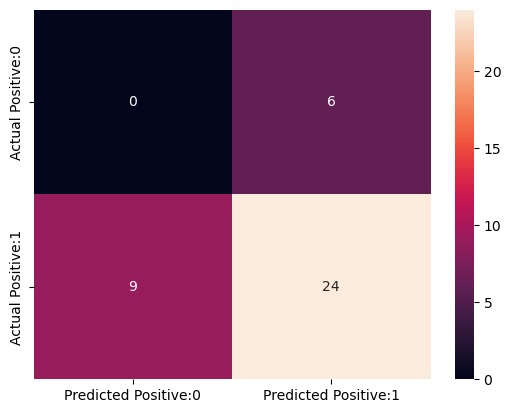

In [101]:
print ("           Decsion Tree")

# A decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works by recursively splitting the training data into smaller subsets based on the feature values until the subsets become pure (i.e., all instances in a subset belong to the same class).
decison_tree = DecisionTreeClassifier() #creates an instance of the decision tree classifier, which will be used to train a decision tree model on our dataset.
decison_tree.fit(X_train, Y_train) ##Model is trained on some data using the ".fit()" method. The training data is split into two parts: the input data ("X_train") and the output data ("Y_train"). The model is trained to learn the relationship between the input data and the output data, so that it can predict the output values for new input data that it hasn't seen before.

X_train_prediction = decison_tree.predict(X_train)#"Make predictions on the input data used for training stored in the "X_train" variable. The predicted output values are stored in a new variable "X_train_prediction"
train_accuracy = (X_train_prediction == Y_train ).sum() / len(Y_train) #calculating the accuracy of the model on the training data. It is comparing the predicted labels stored in the X_train_prediction variable with the actual labels in Y_train and calculating the number of correct predictions. Then, it divides the number of correct predictions by the total number of data points in the training data to get the accuracy score.
print('Accuracy score of training data : ', train_accuracy) # Printing the Training Data Accuracy. The accuracy score represents the percentage of training data that was correctly predicted by the model. 

X_test_prediction = decison_tree.predict(X_test)#"Make predictions on the input data used for testing stored in the "X_test" variable. The predicted output values are stored in a new variable "X_test_prediction"
test_accuracy = (X_test_prediction == Y_test ).sum() / len(Y_test) #calculates the accuracy score of the model on the test set. It compares the predicted labels in X_test_prediction to the actual labels in Y_test, calculates the number of correct predictions using .sum(), and divides by the total number of predictions using len(). The resulting accuracy score is stored in test_accuracy.
print('Accuracy score of test data : ', test_accuracy)#Printing the Testing Data Accuracy. The accuracy score represents the percentage of test data that was correctly predicted by the model.


#The "cross_val_score()" function splits the input data into 10 parts and trains the model on 9 of the folds while using the remaining fold for testing. This process is repeated 10 times, so that each fold is used for testing once. The function then returns an array of 10 scores, one for each fold.
scores = cross_val_score(svm_linear, X, Y, cv=10) # This function takes as input the model ("svm_linear"), the input data ("X"), the output data ("Y"), and the number of folds for cross-validation ("cv=10"). In this case, the number of folds is set to 10.
kfold= np.sum(scores) / len(scores) #calculates the mean score across all 10 folds by summing up the scores using "np.sum(scores)" and dividing by the number of scores using "/ len(scores)". This mean score represents the overall performance of the "svm_linear" model across all 10 folds of the cross-validation.
print('K-fold with 10 folds: ',kfold) #Prinitng The Mean Score. This mean score represents the overall performance of the "svm_linear" model across all 10 folds of the cross-validation.

cf_matrix = confusion_matrix(Y_test, X_test_prediction) #Create a confusion matrix by comparing the predicted output values of the test data X_test_prediction with their actual values Y_test.
print('Confusion matrix\n\n', cf_matrix) # Print the confusion matrix.

print('\nTrue Positives(TP) = ', cf_matrix[1,1]) #Print the number of true positives, which are the number of correct predictions of the positive class.
print('\nTrue Negatives(TN) = ', cf_matrix[0,0]) #Print the number of true negatives, which are the number of correct predictions of the negative class.
print('\nFalse Positives(FP) = ', cf_matrix[0,1]) #Print the number of false positives, which are the number of incorrect predictions of the positive class.
print('\nFalse Negatives(FN) = ', cf_matrix[1,0]) #Print the number of false negatives, which are the number of incorrect predictions of the negative class.

tn, fp, fn, tp = cf_matrix.ravel() #Assigns four variables to the values of the four cells of the confusion matrix using the ravel() method.

recall =  tp/(tp+fn) #calculates the recall using the formula TP / (TP + FN). Recall measures the proportion of actual positive cases that were correctly identified by the model.
print('\nRecall: ',recall) #Printing The Recall Percentage.

precision = tp/(tp+fp) #calculates the precision using the formula TP / (TP + FP). Precision measures the proportion of predicted positive cases that were actually positive.
print('\nPrecision: ', precision) # Printing the precision Percentage. 

F1 = 2 * ((precision*recall) / (precision+recall)) #calculates the F1 score using the formula 2 * (Precision * Recall) / (Precision + Recall). The F1 score is the harmonic mean of precision and recall, and it provides a balanced measure of the model's performance.
print ('\nF1 Score: ',F1) #Printing the F1 Score.

#The pd.DataFrame() function from pandas library creates a new dataframe object cm_matrix.
#The data parameter is set to cf_matrix which is a confusion matrix.
cm_matrix = pd.DataFrame(data=cf_matrix, columns=['Predicted Positive:0', 'Predicted Positive:1'], #The columns parameter is set to a list of two strings, 'Predicted Positive:0' and 'Predicted Positive:1' which will be used as column labels in the new dataframe.
                                 index=['Actual Positive:0', 'Actual Positive:1']) #The index parameter is set to a list of two strings, 'Actual Positive:0' and 'Actual Positive:1' which will be used as index labels in the new dataframe
sns.heatmap(cm_matrix, annot=True) #Creates a heatmap plot of confusion matrix. The annot parameter is set to True to display the values of the confusion matrix in each cell of the heatmap.

In [102]:
#For Testing 
#In the input_data variable provide the values of 10 attributes from the test file which is provided just remove the Status column and paste here and after run check same status label displayed or not
input_data = (0.085569,206.896,0.0068,0.422229,0.177551,197.076,1.743867,0.01098,0.097,192.055)
pd_input = pd.DataFrame([input_data], columns=X.columns) #creates a new DataFrame called pd_input with a single row of input data, where the column names of the new DataFrame match those of an existing DataFrame X.
#The np.array() function converts a Python object, such as a list or a pandas DataFrame, into a NumPy array.
input_data_as_numpy_array = pd_input.to_numpy() # converting a table of data into an array so that it can be used with other functions that require NumPy arrays as input.

# reshape the numpy array. Taking the input_data_as_numpy_array and reshaping it into a new shape, which is a 1-dimensional array with as many columns as the original data had. It's basically putting all the values in a single row.
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) #The reshape() method is used to change the shape of an array without changing the data in it. Here, the first argument is 1 because we want only one row in our new array, and the second argument -1 means that the number of columns should be automatically inferred based on the original shape of the array.


# standardize the data
def Standardizing(X): #The function takes one parameter, which is X.
    mean = X.mean() #This calculates the mean of the input data, which is stored in a variable called mean.
    std = X.std() #This calculates the standard deviation of the input data, which is stored in a variable called std.
    standardized_row = (X - mean) / std #This is the formula for standardization. It subtracts the mean from each data point and divides it by the standard deviation to obtain a standardized value for each data point. The standardized values are stored in a variable called standardized_row.
    return standardized_row #This is the output of the function. It returns the standardized values of the input data.

Standardize = Standardizing(input_data_reshaped) #The function will then standardize the data and return the standardized row as the output. The result is then assigned to a variable named Standardize.
stand = pd.DataFrame(Standardize, columns=X.columns) #creates a new DataFrame called pd_input with a single row of input data, where the column names of the new DataFrame match those of an existing DataFrame X.
prediction = svm_linear.predict(stand) #Using the svm_polynomial model we trained earlier to make a prediction on the Standardize input data, which has been standardized and reshaped into a numpy array. This prediction will be stored in the prediction variable.
print(prediction[0]) #prints the predicted value of the svm_polynomial model.

if (prediction[0] == 0): #This line checks if the first element of the 'prediction' array is equal to 0.
    print("The Person does not have Parkinsons Disease") # If the first element of the 'prediction' array is equal to 0, then we print a message saying that the person does not have Parkinson's Disease.
else: # If the first element of the 'prediction' array is not equal to 0, then we execute the code inside the else block.
    print("The Person has Parkinsons") #If the first element of the 'prediction' array is not equal to 0, then we print a message saying that the person has Parkinson's Disease.


1
The Person has Parkinsons
